# Project 2: Ames, Iowa Multi-Linear Regression (MLR)
## Thomas Ludlow, DSI-NY-6
### December 7, 2018

This project consists of a Multi-Linear Regression model, trained to predict the expected sale price of a house in Ames, IA based on known characteristics of the unit.  Using a dataset from Kaggle.com, we sought to address the following question:

### What features most affect home sales prices in Ames, IA?  What modeling approaches yield the most accurate predictions of Sales Price?

## Executive Summary

In Project 2, we worked with Kaggle data on building sales in Ames, IA that occurred during 2006-2010 to better understand the factors influencing sale prices. We used this understanding to optimize linear regression models, which we then used to make value predictions on Kaggle's test data. We optimized to return the minimum Root Mean Squared Error (RMSE), which Kaggle calculates.

Through the modeling process, we identified a number of key factors and useful methods to build a high-accuracy linear regression model that Zillow may use to predict housing prices for users searching in Ames.


### Contents:
1. [**EDA and Data Cleanup**](#EDA-and-Data-Cleanup)
 - [Review of Null Values](#Review-of-Null-Values)
 - [Logical Data Cleanup](#Data-Cleanup)
 - [Binary Variables](#Binary-Variables)
 - [Sale Time to Recession Feature](#Sale-Time-to-Recession)
 - [Outlier Check](#Outlier-Check)
 - [Exterior and Materials Formatting](#Exterior-and-Materials-Formatting)
 - [Data Cleanup Final Check](#Data-Cleanup-Final-Check)


2. [**Feature Exploration**](#Feature-Exploration)
 - [Heatmap of Numeric Values](#Heatmap-of-Numeric-Values)
 - [Dummy Variables](#Dummy-Variables)
     -  [Manual Dummies for Garage Age](#Manual-dummies-for-garage_age)
     -  [Manual Dummies for Neighborhood](#Manual-Dummies-for-Neighborhood)
     -  [n-D Dummies for MS Subclass](#n-D-Dummies-for-MS-Subclass)
 - [Correlation Result Plots](#Correlation-Result-Plots)


3. [**Modeling**](#Modeling)
 - [Polynomial Features](#Polynomial-Features)
 - [Train Test Split](#Train-Test-Splitt)
 - [Linear Regression](#Linear-Regression)
 - [Scaling](#Scaling)
 - [PowerTransformer](#PowerTransformer)
 - [Lasso/Ridge](#Lasso/Ridge)
 - [Final Model](#Final-Model)

### Libraries

In [1]:
# Libraries to use for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to use for Linear Regression Modeling
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, PowerTransformer
from sklearn.metrics import r2_score

%matplotlib inline

##### Pandas Display Options - increase max rows/columns

In [ ]:
# pd.options.display.max_columns = 101
# pd.options.display.max_rows = 2101

### Training Data

In [2]:
# Import data
df = pd.read_csv('./datasets/train.csv')

In [3]:
# Import data
df_to_pred = pd.read_csv('./datasets/test.csv')

In [4]:
df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [5]:
df.shape

(2051, 81)

In [6]:
df_to_pred.shape

(879, 80)

In [7]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [8]:
df_to_pred.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


## EDA and Data Cleanup

As part of Exploratory Data Analysis and Cleanup, we applied the following techniques:
- Reformat Column Names
- Identify and Resolve Null Values
- Identify Outliers
- Standardizing Year Features as 'Age' Features
- Standardizing Materials Name Strings

###### Column Names Formatting

In [9]:
df.columns = [name.lower().replace(' ','_') for name in df.columns]

In [10]:
df_to_pred.columns = [name.lower().replace(' ','_') for name in df_to_pred.columns]

### Review of Null Values

###### Full Null Values Columns

In [11]:
df.isnull().sum()[df.isnull().sum()>0]

lot_frontage       330
alley             1911
mas_vnr_type        22
mas_vnr_area        22
bsmt_qual           55
bsmt_cond           55
bsmt_exposure       58
bsmtfin_type_1      55
bsmtfin_sf_1         1
bsmtfin_type_2      56
bsmtfin_sf_2         1
bsmt_unf_sf          1
total_bsmt_sf        1
bsmt_full_bath       2
bsmt_half_bath       2
fireplace_qu      1000
garage_type        113
garage_yr_blt      114
garage_finish      114
garage_cars          1
garage_area          1
garage_qual        114
garage_cond        114
pool_qc           2042
fence             1651
misc_feature      1986
dtype: int64

In [12]:
df_to_pred.isnull().sum()[df_to_pred.isnull().sum()>0]

lot_frontage      160
alley             821
mas_vnr_type        1
mas_vnr_area        1
bsmt_qual          25
bsmt_cond          25
bsmt_exposure      25
bsmtfin_type_1     25
bsmtfin_type_2     25
electrical          1
fireplace_qu      422
garage_type        44
garage_yr_blt      45
garage_finish      45
garage_qual        45
garage_cond        45
pool_qc           875
fence             707
misc_feature      838
dtype: int64

##### Null 'Lot Frontage'

In [13]:
df[df['lot_frontage'].isnull()][df.columns[71:]].head()

,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
7,0,0,NaN,MnPrv,NaN,0,5,2010,COD,142000
8,0,0,NaN,MnPrv,Shed,400,6,2007,WD,112500
23,0,0,NaN,GdPrv,Shed,500,3,2010,WD,185000
27,0,0,NaN,NaN,NaN,0,7,2008,WD,198000


In [14]:
df[df['lot_frontage'].isnull()][df.columns[71:]].shape[0]

330

##### Lot Config contains 'FR' frontage, but Lot Frontage is NaN

In [15]:
df[(df['lot_frontage'].isnull())&(df['lot_config'].str.contains('FR'))][df.columns[9:20]].head()

,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond
106,Lvl,AllPub,FR2,Gtl,Somerst,Norm,Norm,Twnhs,2Story,7,5
226,Lvl,AllPub,FR2,Gtl,Mitchel,Norm,Norm,TwnhsE,1Story,6,5
335,Lvl,AllPub,FR2,Gtl,Gilbert,RRNn,Norm,1Fam,2Story,7,5
430,Lvl,AllPub,FR2,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,7,5
454,Lvl,AllPub,FR2,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,7,5


### Data Cleanup

###### Instantiate Removed Rows DF

In [16]:
# Create DataFrame to store removed rows
df_removed = pd.DataFrame()

###### Remove bad Lot Frontage rows and Fill NaN values with 0

In [17]:
df[(df['lot_frontage'].isnull())&(df['lot_config'].str.contains('FR'))].head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
106,2513,533223080,160,FV,NaN,2651,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2006,WD,165000
226,973,923203190,120,RM,NaN,4500,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2009,WD,165000
335,493,528292070,60,RL,NaN,8755,Pave,NaN,IR1,Lvl,...,0,0,NaN,GdPrv,NaN,0,6,2009,WD,214000
430,1848,533223050,160,FV,NaN,5105,Pave,NaN,IR2,Lvl,...,0,0,NaN,NaN,NaN,0,3,2007,WD,148800
454,104,533223100,160,FV,NaN,2403,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,147110


In [18]:
df[(df['lot_frontage'].isnull())&(df['lot_config'].str.contains('FR'))].shape[0]

12

In [19]:
df_removed = df_removed.append(df[(df['lot_frontage'].isnull())&(df['lot_config'].str.contains('FR'))])

In [20]:
df.drop(df[(df['lot_frontage'].isnull())&(df['lot_config'].str.contains('FR'))].index, inplace=True)

In [21]:
df.lot_frontage.fillna(0,inplace=True)

In [22]:
df_to_pred.lot_frontage.fillna(0,inplace=True)

###### Masonry Veneer Type / Area

In [23]:
df[df.mas_vnr_type.isnull()].head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
22,2393,528142010,60,RL,103.0,12867,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,7,2006,New,344133
41,2383,528110050,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,9,2006,New,465000
86,539,531371050,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,8,2009,WD,184900
212,518,528458020,20,FV,90.0,7993,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,10,2009,New,225000
276,2824,908130020,20,RL,75.0,8050,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2006,WD,117250


In [24]:
df[df.mas_vnr_type.isnull()].shape[0]

22

In [25]:
df.mas_vnr_type.fillna('None',inplace=True)

In [26]:
df.mas_vnr_area.fillna(0,inplace=True)

In [27]:
df_to_pred.mas_vnr_type.fillna('None',inplace=True)

In [28]:
df_to_pred.mas_vnr_area.fillna(0,inplace=True)

#### Basement Cleanup

###### Remove Questionable Basement Exposure NaNs

In [29]:
df[(df['bsmt_cond'].notnull())&(df['bsmt_exposure'].isnull())]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1456,1797,528458090,60,FV,81.0,10411,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,7,2007,New,212109
1547,67,528445060,20,RL,73.0,8987,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,5,2010,WD,221500
1997,2780,907194130,60,RL,65.0,14006,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,2,2006,WD,192500


In [30]:
df_removed = df_removed.append(df[(df['bsmt_cond'].notnull())&(df['bsmt_exposure'].isnull())])

In [31]:
df.drop([1456,1547,1997],inplace=True)

In [32]:
df.loc[1147][33:39]

bsmt_exposure       No
bsmtfin_type_1     GLQ
bsmtfin_sf_1      1124
bsmtfin_type_2     NaN
bsmtfin_sf_2       479
bsmt_unf_sf       1603
Name: 1147, dtype: object

In [33]:
df_removed = df_removed.append(df.loc[1147])

In [34]:
df.drop(1147,inplace=True)

###### Fill NA values ('NA' for categories, 0 for sqft values)

In [35]:
df_to_pred.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

In [36]:
df[df.columns[31:40]].isnull().sum()

bsmt_qual         55
bsmt_cond         55
bsmt_exposure     55
bsmtfin_type_1    55
bsmtfin_sf_1       1
bsmtfin_type_2    55
bsmtfin_sf_2       1
bsmt_unf_sf        1
total_bsmt_sf      1
dtype: int64

In [37]:
bsmt_qualitative = ['bsmt_qual','bsmt_cond','bsmt_exposure','bsmtfin_type_1','bsmtfin_type_2']

In [38]:
# Loop through and fill 'NA' values for all variables in 'bsmt_qualitative' list

for col in bsmt_qualitative:
    df[col].fillna('NA',inplace=True)
    df_to_pred[col].fillna('NA',inplace=True)

In [39]:
bsmt_quantitative = ['bsmtfin_sf_1','bsmtfin_sf_2','bsmt_unf_sf','total_bsmt_sf']

In [40]:
# Loop through and fill 'NA' values for all variables in 'bsmt_quantitative' list

for col in bsmt_quantitative:
    df[col].fillna(0,inplace=True)
    df_to_pred[col].fillna(0,inplace=True)

In [41]:
df.isnull().sum()[30:52]

foundation         0
bsmt_qual          0
bsmt_cond          0
bsmt_exposure      0
bsmtfin_type_1     0
bsmtfin_sf_1       0
bsmtfin_type_2     0
bsmtfin_sf_2       0
bsmt_unf_sf        0
total_bsmt_sf      0
heating            0
heating_qc         0
central_air        0
electrical         0
1st_flr_sf         0
2nd_flr_sf         0
low_qual_fin_sf    0
gr_liv_area        0
bsmt_full_bath     2
bsmt_half_bath     2
full_bath          0
half_bath          0
dtype: int64

In [42]:
df[['bsmt_qual','bsmt_cond','bsmt_exposure',
          'bsmtfin_type_1','bsmtfin_type_2']].head()

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2
0,TA,TA,No,GLQ,Unf
1,Gd,TA,No,GLQ,Unf
2,TA,TA,No,GLQ,Unf
3,Gd,TA,No,Unf,Unf
4,Fa,Gd,No,Unf,Unf


In [43]:
df[(df.bsmt_full_bath.isnull())|(df.bsmt_half_bath.isnull())]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
616,1498,908154080,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,7,2008,WD,284700
1327,1342,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


In [44]:
# Fill 'NA' values for training and holdout dataframes for 'full_bath', 'half_bath'

df.bsmt_full_bath.fillna(0,inplace=True)
df.bsmt_half_bath.fillna(0,inplace=True)

In [45]:
df_to_pred.bsmt_full_bath.fillna(0,inplace=True)
df_to_pred.bsmt_half_bath.fillna(0,inplace=True)

In [46]:
df[(df['bsmt_full_bath']==0)|(df['bsmt_half_bath']==0)][['bsmt_qual','bsmt_full_bath','bsmt_half_bath']].head()

,bsmt_qual,bsmt_full_bath,bsmt_half_bath
0,TA,0.0,0.0
1,Gd,1.0,0.0
2,TA,1.0,0.0
3,Gd,0.0,0.0
4,Fa,0.0,0.0


###### Remove Garage with Missing Year Data

In [47]:
df_removed = df_removed.append(df.loc[1712])

In [48]:
df.drop(1712,inplace=True)

###### Correct 'garage_yr_blt' from 2207 to 2007

In [49]:
df[df['garage_yr_blt']>2010][['year_built','garage_yr_blt']]

,year_built,garage_yr_blt
1699,2006,2207.0


In [50]:
df.loc[1699,'garage_yr_blt'] = 2007

###### Fill remaining NA values per Data Dictionary

In [51]:
garage_na_cols = ['alley','fireplace_qu','garage_type',
                  'garage_finish','garage_qual','garage_cond',
                  'pool_qc','fence','misc_feature']

for col in garage_na_cols:
    df[col].fillna('NA',inplace=True)
    df_to_pred[col].fillna('NA',inplace=True)

In [52]:
df_to_pred.electrical.fillna('NA',inplace=True)

### Binary Variables

##### Binarize 'street' as 'street_is_paved'

In [53]:
# Uses dictionary to map 1/0 onto Pave/Grvl values

df.street = df.street.map({'Pave':1,'Grvl':0})
df_to_pred.street = df_to_pred.street.map({'Pave':1,'Grvl':0})

In [54]:
df.rename(columns={'street':'street_is_pave'},inplace=True)
df_to_pred.rename(columns={'street':'street_is_pave'},inplace=True)

##### Binarize Central Air

In [55]:
# Maps 1/0 onto Y/N for Central Air

df.central_air = df.central_air.map({'Y':1,'N':0})
df_to_pred.central_air = df_to_pred.central_air.map({'Y':1,'N':0})

In [56]:
df.rename(columns={'central_air':'has_central_air'},inplace=True)
df_to_pred.rename(columns={'central_air':'has_central_air'},inplace=True)

##### Add 'age at sale' column

In [57]:
# Converted to age to standardize against different years sold

df['age_at_sale'] = df['yr_sold'] - df['year_built']

In [58]:
df_to_pred['age_at_sale'] = df_to_pred['yr_sold'] - df_to_pred['year_built']

##### Add 'age of remod' column

In [59]:
# Standardizing age of remodel

df['age_of_remod'] = df['yr_sold'] - df['year_remod/add']

In [60]:
df_to_pred['age_of_remod'] = df_to_pred['yr_sold'] - df_to_pred['year_remod/add']

### Sale Time to Recession Feature

##### Add 'sale_time_to_recession' column

In [61]:
# Calculate time difference from 2008 recession given a months and years argument

def m_y_to_recession_in_yrs(month, year):
    r_mo = 9
    r_yr = 2008
    s_t_t_r=0
    if year==r_yr:
        s_t_t_r = (month - r_mo) / 12
    elif year>r_yr:
        if month>=r_mo:
            s_t_t_r = (year - r_yr) + (month - r_mo)/12
        elif month<r_mo:
            s_t_t_r = (year - r_yr - 1) + (month+12 - r_mo)/12
    else:
        s_t_t_r = (year - r_yr) + (month - r_mo)/12
    return s_t_t_r

In [62]:
# Function adapted to work with DataFrame Series - this function was used to 
# create 'sale_time_to_recession' variable in both DataFrames

def m_y_to_recession_in_yrs_srs(df, month, year):
    r_mo = 9
    r_yr = 2008
    s_t_t_r={}
    for i, row in df.iterrows():
        if year.loc[i]==r_yr:
            s_t_t_r[i] = (month.loc[i] - r_mo) / 12
        elif year.loc[i]>r_yr:
            if month.loc[i]>=r_mo:
                s_t_t_r[i] = (year.loc[i] - r_yr) + (month.loc[i] - r_mo)/12
            elif month.loc[i]<r_mo:
                s_t_t_r[i] = (year.loc[i] - r_yr - 1) + (month.loc[i]+12 - r_mo)/12
        else:
            s_t_t_r[i] = (year.loc[i] - r_yr) + (month.loc[i] - r_mo)/12
    return s_t_t_r

In [63]:
df['sale_time_to_recession'] = m_y_to_recession_in_yrs_srs(df,df['mo_sold'],df['yr_sold'])

In [64]:
df_to_pred['sale_time_to_recession'] = m_y_to_recession_in_yrs_srs(df_to_pred, df_to_pred['mo_sold'],df_to_pred['yr_sold'])

### Outlier Check

In [65]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2034.0,1.475028e+03,8.436190e+02,1.0,7.542500e+02,1486.5,2.198500e+03,2930.0
pid,2034.0,7.143786e+08,1.886973e+08,526301100.0,5.284770e+08,535454065.0,9.071801e+08,924152030.0
ms_subclass,2034.0,5.690020e+01,4.275688e+01,20.0,2.000000e+01,50.0,7.000000e+01,190.0
lot_frontage,2034.0,5.825467e+01,3.296304e+01,0.0,4.400000e+01,63.0,7.800000e+01,313.0
lot_area,2034.0,1.006037e+04,6.754559e+03,1300.0,7.500000e+03,9402.5,1.150000e+04,159000.0
street_is_pave,2034.0,9.965585e-01,5.857762e-02,0.0,1.000000e+00,1.0,1.000000e+00,1.0
overall_qual,2034.0,6.107670e+00,1.425545e+00,1.0,5.000000e+00,6.0,7.000000e+00,10.0
overall_cond,2034.0,5.564405e+00,1.107161e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.0
year_built,2034.0,1.971548e+03,3.019069e+01,1872.0,1.953000e+03,1974.0,2.001000e+03,2010.0
year_remod/add,2034.0,1.984083e+03,2.106429e+01,1950.0,1.964000e+03,1993.0,2.004000e+03,2010.0


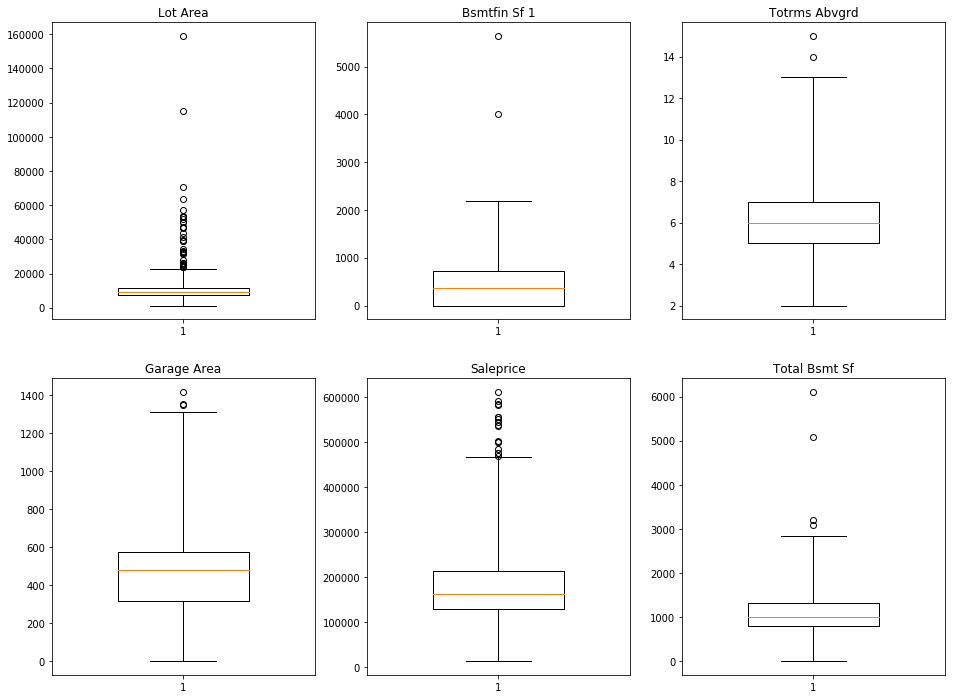

In [66]:
# Create box plots for high correlation variables

box_list = ['lot_area','bsmtfin_sf_1','totrms_abvgrd','garage_area','saleprice','total_bsmt_sf']

fig, ax = plt.subplots(2,3,figsize=(16, 12))
ax=ax.ravel()

for i, col in enumerate(box_list): 
    ax[i].boxplot(df[col], widths=[0.5], whis=3)
    ax[i].set_title(col.replace('_',' ').title(),fontsize=12)

#### Saleprice Outliers

In [67]:
df.sort_values('saleprice',ascending=False)[:12]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street_is_pave,alley,lot_shape,land_contour,...,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,age_at_sale,age_of_remod,sale_time_to_recession
1671,45,528150070,20,RL,100.0,12919,1,NA,IR1,Lvl,...,NA,NA,0,3,2010,New,611657,1,0,1671
1964,1638,527216080,20,RL,52.0,51974,1,NA,IR1,Lvl,...,NA,NA,0,6,2007,New,591587,1,0,1964
1692,2451,528360050,60,RL,114.0,17242,1,NA,IR1,Lvl,...,NA,NA,0,5,2006,WD,584500,13,12,1692
1796,434,528110090,60,RL,107.0,13891,1,NA,Reg,Lvl,...,NA,NA,0,1,2009,New,582933,1,0,1796
151,2333,527212030,60,RL,85.0,16056,1,NA,IR1,Lvl,...,NA,NA,0,7,2006,New,556581,1,0,151
1164,424,528106020,20,RL,105.0,15431,1,NA,Reg,Lvl,...,NA,NA,0,4,2009,WD,555000,1,1,1164
623,457,528176030,20,RL,100.0,14836,1,NA,IR1,HLS,...,NA,NA,0,2,2009,WD,552000,5,4,623
138,2331,527210040,60,RL,60.0,18062,1,NA,IR1,HLS,...,NA,NA,0,9,2006,New,545224,0,0,138
823,16,527216070,60,RL,47.0,53504,1,NA,IR2,HLS,...,NA,NA,0,6,2010,WD,538000,7,7,823
1592,2335,527214060,60,RL,82.0,16052,1,NA,IR1,Lvl,...,NA,NA,0,7,2006,New,535000,0,0,1592


In [68]:
df_removed = df_removed.append(df.sort_values('saleprice',ascending=False)[:12])

In [69]:
df.drop(df.sort_values('saleprice',ascending=False)[:12].index,inplace=True)

#### Total Bsmt SF

In [70]:
df[df['total_bsmt_sf']>3000]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street_is_pave,alley,lot_shape,land_contour,...,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,age_at_sale,age_of_remod,sale_time_to_recession
328,1773,528366050,20,RL,0.0,12692,1,NA,IR1,Lvl,...,NA,NA,0,5,2007,WD,430000,15,14,328
960,1499,908154235,60,RL,313.0,63887,1,NA,IR3,Bnk,...,NA,NA,0,1,2008,New,160000,0,0,960
1885,2181,908154195,20,RL,128.0,39290,1,NA,IR1,Bnk,...,NA,Elev,17000,10,2007,New,183850,-1,-2,1885


In [71]:
df_removed = df_removed.append(df[df['total_bsmt_sf']>3000])

In [72]:
df.drop(df[df['total_bsmt_sf']>3000].index,inplace=True)

#### Lot Area Outlier

In [73]:
df[df['lot_area']>60000] # Remove outlier based on box plot

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street_is_pave,alley,lot_shape,land_contour,...,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,age_at_sale,age_of_remod,sale_time_to_recession
471,2116,906426060,50,RL,0.0,159000,1,NA,IR2,Low,...,NA,Shed,500,6,2007,WD,277000,49,1,471
694,2072,905301050,20,RL,0.0,115149,1,NA,IR2,Low,...,NA,NA,0,6,2007,WD,302000,36,5,694
1854,2767,906475200,20,RL,62.0,70761,1,NA,IR1,Low,...,NA,NA,0,12,2006,WD,280000,31,31,1854


In [74]:
df_removed = df_removed.append(df[df['lot_area']>60000])

In [75]:
df.drop(df[df['lot_area']>60000].index,inplace=True)

#### Remove Rooms Above Ground Outliers

In [76]:
df[df['totrms_abvgrd']>13]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street_is_pave,alley,lot_shape,land_contour,...,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,age_at_sale,age_of_remod,sale_time_to_recession
858,2195,909176080,190,RH,60.0,10896,1,Pave,Reg,Bnk,...,NA,NA,0,3,2007,WD,200000,93,12,858


In [77]:
df_removed = df_removed.append(df[df['totrms_abvgrd']>13])

In [78]:
df.drop(858,inplace=True)

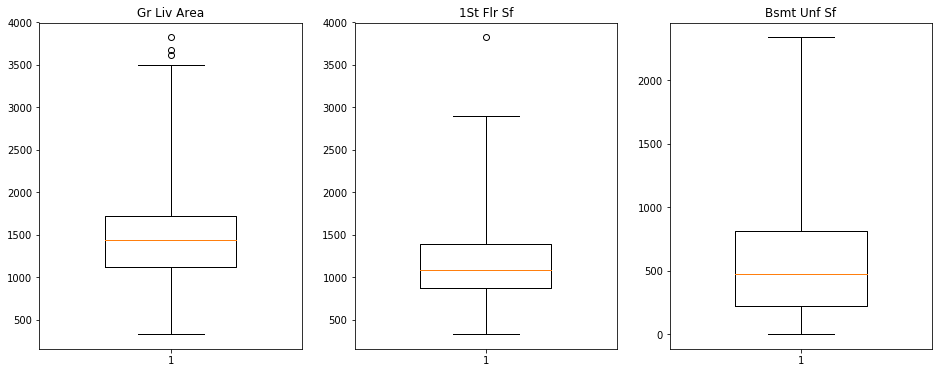

In [79]:
box_list = ['gr_liv_area','1st_flr_sf','bsmt_unf_sf']

fig, ax = plt.subplots(1,3,figsize=(16, 6))
ax=ax.ravel()

for i, col in enumerate(box_list):
    ax[i].boxplot(df[col], widths=[0.5], whis=3)
    ax[i].set_title(col.replace('_',' ').title(),fontsize=12)

#### Gr Living Area Outlier

In [80]:
df[df.gr_liv_area>3500]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street_is_pave,alley,lot_shape,land_contour,...,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,age_at_sale,age_of_remod,sale_time_to_recession
616,1498,908154080,20,RL,123.0,47007,1,NA,IR1,Lvl,...,NA,NA,0,7,2008,WD,284700,49,12,616
1035,2667,902400110,75,RM,90.0,22950,1,NA,IR2,Lvl,...,GdPrv,NA,0,6,2006,WD,475000,114,13,1035
1897,2738,905427030,75,RL,60.0,19800,1,NA,Reg,Lvl,...,NA,NA,0,12,2006,WD,415000,71,16,1897


In [81]:
df_removed = df_removed.append(df[df.gr_liv_area>3500])

In [82]:
df.sort_values('1st_flr_sf',ascending=False)[:3]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street_is_pave,alley,lot_shape,land_contour,...,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,age_at_sale,age_of_remod,sale_time_to_recession
616,1498,908154080,20,RL,123.0,47007,1,NA,IR1,Lvl,...,NA,NA,0,7,2008,WD,284700,49,12,616
1243,1573,916325080,20,RL,0.0,15498,1,NA,IR1,Lvl,...,NA,NA,0,5,2008,COD,287000,32,32,1243
952,2231,909475230,20,RL,70.0,18044,1,NA,IR1,HLS,...,NA,NA,0,8,2007,WD,315000,21,21,952


In [83]:
df.rename(columns={'1st_flr_sf':'first_flr_sf','2nd_flr_sf':'second_fl_sf','3ssn_porch':'three_ssn_porch'},inplace=True)

In [84]:
df_to_pred.rename(columns={'1st_flr_sf':'first_flr_sf','2nd_flr_sf':'second_fl_sf','3ssn_porch':'three_ssn_porch'},inplace=True)

### Exterior and Materials Formatting
##### Standardizing text labels

In [85]:
df.exterior_1st.value_counts()

VinylSd    706
MetalSd    326
HdBoard    300
Wd Sdng    274
Plywood    150
CemntBd     83
BrkFace     63
WdShing     45
AsbShng     33
Stucco      26
BrkComm      3
Stone        2
CBlock       2
AsphShn      1
ImStucc      1
Name: exterior_1st, dtype: int64

In [86]:
df_to_pred.exterior_1st.value_counts()

VinylSd    302
Wd Sdng    144
HdBoard    142
MetalSd    119
Plywood     69
CemntBd     36
BrkFace     24
Stucco      16
AsbShng     11
WdShing     11
BrkComm      3
PreCast      1
AsphShn      1
Name: exterior_1st, dtype: int64

In [87]:
# Dictionary to replace values that vary between 'exterior_1st' and 'exterior_2nd'

df = df.replace({'exterior_2nd':{'CmentBd':'CemntBd','Brk Cmn':'BrkComm','Wd Shng':'WdShing'},
                 'mas_vnr_type':{'BrkCmn':'BrkComm'}})
df_to_pred = df_to_pred.replace({'exterior_2nd':{'CmentBd':'CemntBd','Brk Cmn':'BrkComm','Wd Shng':'WdShing'},
                                 'mas_vnr_type':{'BrkCmn':'BrkComm'}})

In [88]:
df.exterior_2nd.value_counts()

VinylSd    703
MetalSd    319
HdBoard    274
Wd Sdng    262
Plywood    182
CemntBd     84
WdShing     62
BrkFace     33
Stucco      29
AsbShng     28
BrkComm     17
ImStucc     11
Stone        6
AsphShn      3
CBlock       2
Name: exterior_2nd, dtype: int64

In [89]:
df_to_pred.exterior_2nd.value_counts()

VinylSd    294
Wd Sdng    135
HdBoard    131
MetalSd    123
Plywood     89
CemntBd     36
WdShing     18
Stucco      17
BrkFace     13
AsbShng     10
BrkComm      5
ImStucc      4
PreCast      1
AsphShn      1
CBlock       1
Other        1
Name: exterior_2nd, dtype: int64

In [90]:
df.roof_matl.value_counts()

CompShg    1991
Tar&Grv      15
WdShngl       4
WdShake       4
Membran       1
Name: roof_matl, dtype: int64

In [91]:
df.mas_vnr_type.value_counts()

None       1229
BrkFace     617
Stone       157
BrkComm      12
Name: mas_vnr_type, dtype: int64

### Data Cleanup Final Check

In [92]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2015.0,1.474477e+03,8.430637e+02,1.0,757.0,1479.0,2198.0,2930.0
pid,2015.0,7.150083e+08,1.886968e+08,526301100.0,528480065.0,535455090.0,907180610.0,924152030.0
ms_subclass,2015.0,5.700993e+01,4.277583e+01,20.0,20.0,50.0,70.0,190.0
lot_frontage,2015.0,5.804119e+01,3.241600e+01,0.0,44.0,63.0,78.0,313.0
lot_area,2015.0,9.789857e+03,4.878106e+03,1300.0,7500.0,9364.0,11426.0,57200.0
street_is_pave,2015.0,9.965261e-01,5.885232e-02,0.0,1.0,1.0,1.0,1.0
overall_qual,2015.0,6.082878e+00,1.403139e+00,1.0,5.0,6.0,7.0,10.0
overall_cond,2015.0,5.567742e+00,1.110236e+00,1.0,5.0,5.0,6.0,9.0
year_built,2015.0,1.971334e+03,3.016448e+01,1872.0,1953.0,1973.0,2001.0,2010.0
year_remod/add,2015.0,1.983904e+03,2.106688e+01,1950.0,1964.0,1993.0,2004.0,2010.0


In [93]:
df_to_pred.describe().T

,count,mean,std,min,25%,50%,75%,max
id,879.0,1.445588e+03,8.507171e+02,2.0,692.5,1435.0,2197.0,2.928000e+03
pid,879.0,7.165050e+08,1.889135e+08,526302110.0,528486085.0,535454160.0,907192140.0,1.007100e+09
ms_subclass,879.0,5.827076e+01,4.221139e+01,20.0,20.0,50.0,70.0,1.900000e+02
lot_frontage,879.0,5.695563e+01,3.433868e+01,0.0,40.0,60.0,78.5,1.820000e+02
lot_area,879.0,1.034092e+04,1.004734e+04,1477.0,7298.5,9453.0,11606.5,2.152450e+05
street_is_pave,879.0,9.943117e-01,7.524870e-02,0.0,1.0,1.0,1.0,1.000000e+00
overall_qual,879.0,6.054608e+00,1.374756e+00,2.0,5.0,6.0,7.0,1.000000e+01
overall_cond,879.0,5.565415e+00,1.128422e+00,1.0,5.0,5.0,6.0,9.000000e+00
year_built,879.0,1.970534e+03,3.040353e+01,1880.0,1954.0,1972.0,2000.0,2.010000e+03
year_remod/add,879.0,1.984445e+03,2.045455e+01,1950.0,1967.0,1992.0,2003.0,2.010000e+03


## Export to File

In [94]:
# Save values to intermediate file

df.to_csv('./datasets/train_eda.csv',index_label=False)
df_removed.to_csv('./datasets/train_removed.csv',index_label=False)

In [95]:
df_to_pred.to_csv('./datasets/test_eda.csv',index_label=False)

# CHECKPOINT 1 - EDA COMPLETE

## Reimport from File

###### Libraries

In [96]:
# Reimport libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, PowerTransformer
from sklearn.metrics import r2_score

%matplotlib inline

##### Adjust Pandas Max Rows/Columns

In [ ]:
# pd.options.display.max_columns = 101
# pd.options.display.max_rows = 2101

In [ ]:
# pd.reset_option("display.max_rows")
# pd.reset_option("display.max_columns")

##### Reimport from file

In [97]:
df = pd.read_csv('./datasets/train_eda.csv',na_filter=False)

In [98]:
df_removed = pd.read_csv('./datasets/train_removed.csv',na_filter=False)

In [99]:
df_to_pred = pd.read_csv('./datasets/test_eda.csv',na_filter=False)

In [100]:
df.isnull().sum().sum()

0

In [101]:
df_to_pred.isnull().sum().sum()

0

###### Update data types

In [102]:
to_dt_cols = ['year_built','year_remod/add','yr_sold']

for col in to_dt_cols:
    dt_fmt = pd.to_datetime(df[col],format='%Y')
    dt_fmt_pred = pd.to_datetime(df_to_pred[col],format='%Y') # Change year variables to 
    df[col] = dt_fmt.dt.year                                  # pd.datetime format to calc
    df_to_pred[col] = dt_fmt_pred.dt.year                     # year differences

In [103]:
df.loc[df[df['garage_yr_blt']==''].index,'garage_yr_blt'] = pd.NaT # use 'Not a Time' pandas null

In [104]:
df_to_pred.loc[df_to_pred[df_to_pred['garage_yr_blt']==''].index,'garage_yr_blt'] = pd.NaT

In [105]:
dt_fmt = pd.to_datetime(df.garage_yr_blt,format='%Y.%f')
dt_fmt_pred = pd.to_datetime(df_to_pred.garage_yr_blt,format='%Y.%f') # Format for just year

In [106]:
df.loc[:,'garage_yr_blt'] = dt_fmt.dt.year
df_to_pred.loc[:,'garage_yr_blt'] = dt_fmt_pred.dt.year  # Access and save year

In [107]:
df.loc[df[df['garage_yr_blt'].isnull()].index,'garage_yr_blt'] = pd.NaT

In [108]:
df_to_pred.loc[df_to_pred[df_to_pred['garage_yr_blt'].isnull()].index,'garage_yr_blt'] = pd.NaT

###### Update data types - non-numbers to strings

In [109]:
df.loc[:,'ms_subclass'] = df['ms_subclass'].astype(str)
df_to_pred.loc[:,'ms_subclass'] = df_to_pred['ms_subclass'].astype(str)

In [110]:
df.loc[:,'id'] = df['id'].astype(str)
df_to_pred.loc[:,'id'] = df_to_pred['id'].astype(str)

In [111]:
df.loc[:,'pid'] = df['pid'].astype(str)
df_to_pred.loc[:,'pid'] = df_to_pred['pid'].astype(str)

## Feature Exploration

After completing EDA procedures, this section documents the exploration of feature attributes using:
- Correlation Heatmaps
- Histograms, Pairplots
- One-Hot Encoding "Dummy Variables"
- Assigning Numeric Values to Ordinal Variables

### Heatmap of Numeric Values

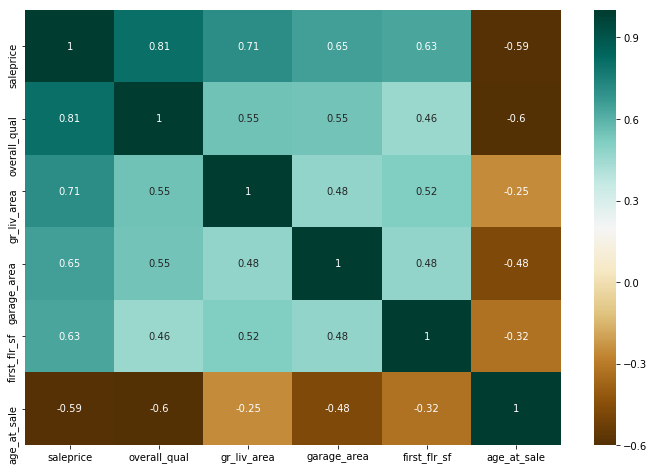

In [112]:
# Heatmap for high-correlation variables, sorted by target vector 'saleprice'

plt.figure(figsize=(12,8))
sns.heatmap(df[['saleprice','overall_qual','gr_liv_area',
             'garage_area','first_flr_sf','age_at_sale']].corr(),annot=True,cmap='BrBG');

#### Year Variable Histograms

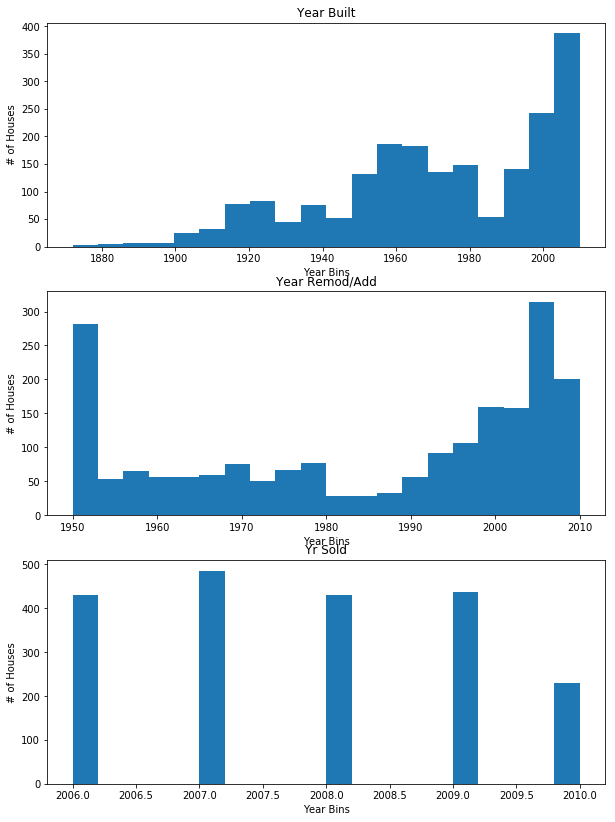

In [113]:
year_cols = ['year_built','year_remod/add','yr_sold']
fig, ax = plt.subplots(3,1,figsize=(10,14))
ax = ax.ravel()

for i, col in enumerate(year_cols): # Plot histograms for year distributions
    ax[i].hist(df[col], bins=20)
    ax[i].set_title(col.replace('_',' ').title(),fontsize=12)
    ax[i].set_ylabel('# of Houses')
    ax[i].set_xlabel('Year Bins')

In [114]:
garage_yr_blt_vals = df[df['garage_yr_blt'].notnull()]['garage_yr_blt']

In [115]:
garage_yr_blt_vals.index = range(len(garage_yr_blt_vals))

In [116]:
garage_yr_blt_vals = garage_yr_blt_vals.astype(int)

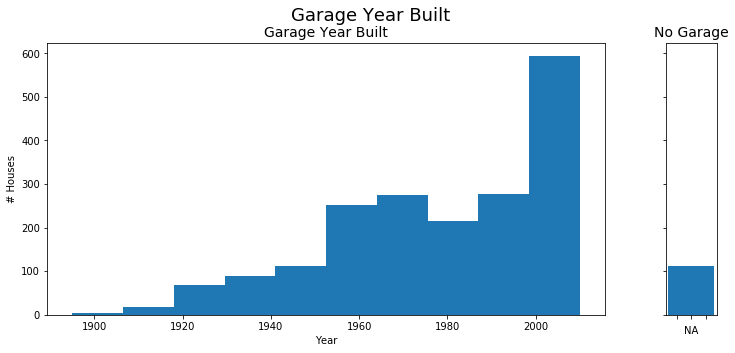

In [117]:
fig, ax = plt.subplots(1,2,figsize=(12,5),gridspec_kw = {'width_ratios':[11, 1]},sharey=True)
ax[0].set_title('Garage Year Built',fontsize=14)
ax[0].hist(garage_yr_blt_vals)
ax[0].set_ylabel('# Houses')
ax[0].set_xlabel('Year')

ax[1].set_title('No Garage',fontsize=14)
ax[1].bar(0, len(df[df['garage_yr_blt'].isnull()])) # Show garage year hist next to no garage
ax[1].set_xlabel('NA')
ax[1].set_xticklabels('')

plt.suptitle('Garage Year Built',fontsize=18);

In [118]:
len(df[df['garage_yr_blt'].isnull()])

112

## Dummy Variables

#### Dummy Models for Garage Age
##### Building categories: by x-percentile grouping

In [119]:
df['garage_age'] = df['yr_sold'] - df['garage_yr_blt']

In [120]:
df_to_pred['garage_age'] = df_to_pred['yr_sold'] - df_to_pred['garage_yr_blt']

In [121]:
df.garage_age.mean()

29.509196006305832

### Manual dummies for garage_age

In [122]:
#pct_list = list(range(15,100,15)) - 181203 and earlier.  181204a was 10%. 181206 - 11%
pct_list = list(range(11,100,11))

for i, pct in enumerate(pct_list): # For each percentile group
    age_val = np.percentile(df[df.garage_age.notnull()].garage_age, pct)
    if i==0: # On the first iteration
        col_name_str = 'garage_age_{}_or_less'.format(str(int(age_val)))
        print(col_name_str)
        df[col_name_str] = df.garage_age.map(lambda x: 1 if x <= age_val else 0)
        df_to_pred[col_name_str] = df_to_pred.garage_age.map(lambda x: 1 if x <= age_val else 0)
    elif i<len(pct_list): # On 2nd to the final iterations
        col_name_str = 'garage_age_{}_{}'.format(str(int(age_val_prev+1)), str(int(age_val)))
        print(col_name_str)
        df[col_name_str] = df.garage_age.map(lambda x: 1 if (x>age_val_prev)&(x<=age_val) else 0)
        df_to_pred[col_name_str] = df_to_pred.garage_age.map(lambda x: 1 if (x>age_val_prev)&(x<=age_val) else 0)
    if i==len(pct_list)-1: # Only on final iteration
        col_name_str = 'garage_age_over_' + str(int(age_val+1))      
        print(col_name_str)
        df[col_name_str] = df.garage_age.map(lambda x: 1 if x > age_val else 0)
        df_to_pred[col_name_str] = df_to_pred.garage_age.map(lambda x: 1 if x > age_val else 0)
    age_val_prev = age_val # Store previous age value for next iteration variable name

garage_age_1_or_less
garage_age_2_5
garage_age_6_10
garage_age_11_19
garage_age_20_31
garage_age_32_40
garage_age_41_49
garage_age_50_59
garage_age_60_91
garage_age_over_92


In [123]:
# Dummy for 'no_garage'

df['no_garage'] = df.garage_type.map(lambda x: 1 if x=='NA' else 0)
df_to_pred['no_garage'] = df_to_pred.garage_type.map(lambda x: 1 if x=='NA' else 0)

In [124]:
df.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street_is_pave,alley,lot_shape,land_contour,...,garage_age_2_5,garage_age_6_10,garage_age_11_19,garage_age_20_31,garage_age_32_40,garage_age_41_49,garage_age_50_59,garage_age_60_91,garage_age_over_92,no_garage
0,109,533352170,60,RL,0.0,13517,1,NA,IR1,Lvl,...,0,0,0,0,1,0,0,0,0,0
1,544,531379050,60,RL,43.0,11492,1,NA,IR1,Lvl,...,0,0,1,0,0,0,0,0,0,0
2,153,535304180,20,RL,68.0,7922,1,NA,Reg,Lvl,...,0,0,0,0,0,0,1,0,0,0
3,318,916386060,60,RL,73.0,9802,1,NA,Reg,Lvl,...,1,0,0,0,0,0,0,0,0,0
4,255,906425045,50,RL,82.0,14235,1,NA,IR1,Lvl,...,0,0,0,0,0,0,1,0,0,0


In [125]:
df_to_pred.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street_is_pave,alley,lot_shape,land_contour,...,garage_age_2_5,garage_age_6_10,garage_age_11_19,garage_age_20_31,garage_age_32_40,garage_age_41_49,garage_age_50_59,garage_age_60_91,garage_age_over_92,no_garage
0,2658,902301120,190,RM,69.0,9142,1,Grvl,Reg,Lvl,...,0,0,0,0,0,0,0,0,1,0
1,2718,905108090,90,RL,0.0,9662,1,NA,IR1,Lvl,...,0,0,0,1,0,0,0,0,0,0
2,2414,528218130,60,RL,58.0,17104,1,NA,IR1,Lvl,...,0,0,0,0,0,0,0,0,0,0
3,1989,902207150,30,RM,60.0,8520,1,NA,Reg,Lvl,...,0,0,0,0,0,0,0,1,0,0
4,625,535105100,20,RL,0.0,9500,1,NA,IR1,Lvl,...,0,0,0,0,0,1,0,0,0,0


##### Dummies for 'ms_zoning'

In [126]:
df.ms_zoning.value_counts()

RL         1569
RM          314
FV           97
C (all)      19
RH           13
A (agr)       2
I (all)       1
Name: ms_zoning, dtype: int64

In [127]:
df_to_pred.ms_zoning.value_counts()

RL         675
RM         146
FV          38
RH          13
C (all)      6
I (all)      1
Name: ms_zoning, dtype: int64

In [128]:
zone_temp_df = pd.get_dummies(df, columns=['ms_zoning'])

In [129]:
zone_temp_df_to_pred = pd.get_dummies(df_to_pred, columns=['ms_zoning'])

In [130]:
zone_temp_df.columns.tolist()[:5]

['id', 'pid', 'ms_subclass', 'lot_frontage', 'lot_area']

In [131]:
zone_temp_df_to_pred.columns.tolist()[:5]

['id', 'pid', 'ms_subclass', 'lot_frontage', 'lot_area']

In [132]:
# Dummy variables for 'ms_zoning'

col_list = ['ms_zoning_C (all)','ms_zoning_FV','ms_zoning_I (all)',
            'ms_zoning_RH','ms_zoning_RL','ms_zoning_RM']

for col in col_list:
    df[col] = zone_temp_df[col] # Apply to DataFrames
    df_to_pred[col] = zone_temp_df_to_pred[col]

In [133]:
df.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street_is_pave,alley,lot_shape,land_contour,...,garage_age_50_59,garage_age_60_91,garage_age_over_92,no_garage,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM
0,109,533352170,60,RL,0.0,13517,1,NA,IR1,Lvl,...,0,0,0,0,0,0,0,0,1,0
1,544,531379050,60,RL,43.0,11492,1,NA,IR1,Lvl,...,0,0,0,0,0,0,0,0,1,0
2,153,535304180,20,RL,68.0,7922,1,NA,Reg,Lvl,...,1,0,0,0,0,0,0,0,1,0
3,318,916386060,60,RL,73.0,9802,1,NA,Reg,Lvl,...,0,0,0,0,0,0,0,0,1,0
4,255,906425045,50,RL,82.0,14235,1,NA,IR1,Lvl,...,1,0,0,0,0,0,0,0,1,0


In [134]:
df_to_pred.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street_is_pave,alley,lot_shape,land_contour,...,garage_age_50_59,garage_age_60_91,garage_age_over_92,no_garage,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM
0,2658,902301120,190,RM,69.0,9142,1,Grvl,Reg,Lvl,...,0,0,1,0,0,0,0,0,0,1
1,2718,905108090,90,RL,0.0,9662,1,NA,IR1,Lvl,...,0,0,0,0,0,0,0,0,1,0
2,2414,528218130,60,RL,58.0,17104,1,NA,IR1,Lvl,...,0,0,0,0,0,0,0,0,1,0
3,1989,902207150,30,RM,60.0,8520,1,NA,Reg,Lvl,...,0,1,0,0,0,0,0,0,0,1
4,625,535105100,20,RL,0.0,9500,1,NA,IR1,Lvl,...,0,0,0,0,0,0,0,0,1,0


##### Dummies for Bldg Type, House Style

In [135]:
# Creating separate column to be dummied so that original column can be mapped ordinally

df['bldg_type_d'] = df['bldg_type']
df['house_style_d'] = df['house_style']

In [136]:
df_to_pred['bldg_type_d'] = df_to_pred['bldg_type']
df_to_pred['house_style_d'] = df_to_pred['house_style']

In [137]:
df = pd.get_dummies(df, columns=['bldg_type_d','house_style_d'])

In [138]:
df_to_pred = pd.get_dummies(df_to_pred, columns=['bldg_type_d','house_style_d'])

### Manual Dummies for Neighborhood

In [139]:
#pct_list = list(range(85,0,-15)) - for 181203. 181204 used 10%
pct_list = list(range(82,0,-18))

nhood_vals = df.groupby('neighborhood')['saleprice'].median().sort_values(ascending=False)

for i, pct in enumerate(pct_list):
    price_val = np.percentile(nhood_vals, pct)
    if i==0: # On first iteration
        col_name_str = 'nhood_med_abv_' + str(int(price_val))
        print(col_name_str)
        df[col_name_str] = df.neighborhood.map(lambda x: 1 if (nhood_vals[x]>price_val) else 0)
        df_to_pred[col_name_str] = df_to_pred.neighborhood.map(lambda x: 1 if (nhood_vals[x]>price_val) else 0)
    elif i<len(pct_list): # On second to final iterations
        col_name_str = 'nhood_med_{}_{}'.format(str(int(price_val)), str(int(price_val_prev)))
        print(col_name_str)
        df[col_name_str] = df.neighborhood.map(lambda x: 1 if (nhood_vals[x]>=price_val)&(nhood_vals[x]<price_val_prev) else 0)
        df_to_pred[col_name_str] = df_to_pred.neighborhood.map(lambda x: 1 if (nhood_vals[x]>=price_val)&(nhood_vals[x]<price_val_prev) else 0)
    if i==len(pct_list)-1: # Only on final iteration
        col_name_str = 'nhood_med_below_' + str(int(price_val))      
        print(col_name_str)
        df[col_name_str] = df.neighborhood.map(lambda x: 1 if (nhood_vals[x]<price_val) else 0)
        df_to_pred[col_name_str] = df_to_pred.neighborhood.map(lambda x: 1 if (nhood_vals[x]<price_val) else 0)
    price_val_prev = price_val # Store price median for next iteration variable name

nhood_med_abv_230759
nhood_med_194280_230759
nhood_med_168610_194280
nhood_med_136516_168610
nhood_med_115650_136516
nhood_med_below_115650


In [140]:
df.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street_is_pave,alley,lot_shape,land_contour,...,house_style_d_2.5Unf,house_style_d_2Story,house_style_d_SFoyer,house_style_d_SLvl,nhood_med_abv_230759,nhood_med_194280_230759,nhood_med_168610_194280,nhood_med_136516_168610,nhood_med_115650_136516,nhood_med_below_115650
0,109,533352170,60,RL,0.0,13517,1,NA,IR1,Lvl,...,0,1,0,0,0,0,0,0,1,0
1,544,531379050,60,RL,43.0,11492,1,NA,IR1,Lvl,...,0,1,0,0,0,0,1,0,0,0
2,153,535304180,20,RL,68.0,7922,1,NA,Reg,Lvl,...,0,0,0,0,0,0,0,1,0,0
3,318,916386060,60,RL,73.0,9802,1,NA,Reg,Lvl,...,0,1,0,0,0,1,0,0,0,0
4,255,906425045,50,RL,82.0,14235,1,NA,IR1,Lvl,...,0,0,0,0,0,0,1,0,0,0


In [141]:
df_to_pred.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street_is_pave,alley,lot_shape,land_contour,...,house_style_d_2.5Unf,house_style_d_2Story,house_style_d_SFoyer,house_style_d_SLvl,nhood_med_abv_230759,nhood_med_194280_230759,nhood_med_168610_194280,nhood_med_136516_168610,nhood_med_115650_136516,nhood_med_below_115650
0,2658,902301120,190,RM,69.0,9142,1,Grvl,Reg,Lvl,...,0,1,0,0,0,0,0,0,1,0
1,2718,905108090,90,RL,0.0,9662,1,NA,IR1,Lvl,...,0,0,0,0,0,0,0,0,1,0
2,2414,528218130,60,RL,58.0,17104,1,NA,IR1,Lvl,...,0,1,0,0,0,0,1,0,0,0
3,1989,902207150,30,RM,60.0,8520,1,NA,Reg,Lvl,...,0,0,0,0,0,0,0,0,1,0
4,625,535105100,20,RL,0.0,9500,1,NA,IR1,Lvl,...,0,0,0,0,0,0,0,1,0,0


#### Dummies for Foundation

In [142]:
# New columns for dummying

df['foundation_d'] = df['foundation']
df = pd.get_dummies(df,columns=['foundation_d'])

In [143]:
df_to_pred['foundation_d'] = df_to_pred['foundation']
df_to_pred = pd.get_dummies(df_to_pred, columns=['foundation_d'])

In [144]:
df['fireplace_qu_d'] = df['fireplace_qu']
df_to_pred['fireplace_qu_d'] = df_to_pred['fireplace_qu']
df = pd.get_dummies(df, columns=['fireplace_qu_d'])
df_to_pred = pd.get_dummies(df_to_pred, columns=['fireplace_qu_d'])

#### Dummies for Heating, Electrical

In [145]:
# New columns for dummying

df['heating_qc_d'] = df['heating_qc']
df_to_pred['heating_qc_d'] = df_to_pred['heating_qc']

df = pd.get_dummies(df, columns=['heating_qc_d'])

In [146]:
df.drop('heating_qc_d_Po',axis=1,inplace=True)

In [147]:
df_to_pred = pd.get_dummies(df_to_pred, columns=['heating_qc_d'])

In [148]:
df['electrical_d'] = df['electrical']

In [149]:
df_to_pred['electrical_d'] = df_to_pred['electrical']

In [150]:
df = pd.get_dummies(df, columns=['electrical_d'])

In [151]:
df_to_pred = pd.get_dummies(df_to_pred, columns=['electrical_d'])

In [152]:
df_to_pred = df_to_pred.rename({'electrical_d_NA':'electrical_d_Mix'}) # Rename empty value to missing empty value
df_to_pred['electrical_d_Mix'] = 0 # Manual assignment of blank value

#### Dummies for Garage Type, Misc Feature

In [153]:
# Duplicate dummy variables

df['garage_type_d'] = df['garage_type']
df['misc_feature_d'] = df['misc_feature']
df = pd.get_dummies(df, columns=['garage_type_d','misc_feature_d'])

In [154]:
df_to_pred['garage_type_d'] = df_to_pred['garage_type']
df_to_pred['misc_feature_d'] = df_to_pred['misc_feature']

df_to_pred = pd.get_dummies(df_to_pred, columns=['garage_type_d','misc_feature_d'])

In [155]:
df_to_pred['misc_feature_d_TenC'] = 0

### n-D Dummies for MS Subclass 

MS Subclass Data Dictionary:
```
20 1-STORY 1946 & NEWER ALL STYLES
30 1-STORY 1945 & OLDER
40 1-STORY W/FINISHED ATTIC ALL AGES
45 1-1/2 STORY - UNFINISHED ALL AGES
50 1-1/2 STORY FINISHED ALL AGES
60 2-STORY 1946 & NEWER
70 2-STORY 1945 & OLDER
75 2-1/2 STORY ALL AGES
80 SPLIT OR MULTI-LEVEL
85 SPLIT FOYER
90 DUPLEX - ALL STYLES AND AGES
120 1-STORY PUD (Planned Unit Development) - 1946 & NEWER
150 1-1/2 STORY PUD - ALL AGES
160 2-STORY PUD - 1946 & NEWER
180 PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
190 2 FAMILY CONVERSION - ALL STYLES AND AGES
```

In [156]:
df.ms_subclass.value_counts()

20     755
60     380
50     197
120    131
30     101
70      89
80      86
160     85
90      75
190     45
85      28
75      16
45      11
180     11
40       4
150      1
Name: ms_subclass, dtype: int64

In [157]:
# Subclass to text conversion dictionary

subclass_dict = {
    '20': '1-STORY 1946 & NEWER ALL STYLES',
    '30': '1-STORY 1945 & OLDER',
    '40': '1-STORY W/ FINISHED ATTIC ALL AGES',
    '45': '1-HALF STORY - UNFINISHED ALL AGES',
    '50': '1-HALF STORY FINISHED ALL AGES',
    '60': '2-STORY 1946 & NEWER',
    '70': '2-STORY 1945 & OLDER',
    '75': '2-HALF STORY ALL AGES',
    '80': 'SPLIT OR MULTI-LEVEL',
    '85': 'SPLIT FOYER',
    '90': 'DUPLEX - ALL STYLES AND AGES',
    '120': '1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
    '150': '1-HALF STORY PUD - ALL AGES',
    '160': '2-STORY PUD - 1946 & NEWER',
    '180': 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
    '190': '2 FAMILY CONVERSION - ALL STYLES AND AGES'
}

In [158]:
# Subclass column names to text search values

subclass_col_dict = {
    'is_1_story':'1-STORY',
    'is_1_hf_story':'1-HALF STORY',
    'is_2_story':'2-STORY',
    'is_2_hf_story':'2-HALF STORY',
    'is_split_multi':'SPLIT',
    'is_duplex':'DUPLEX',
    'is_pud':'PUD',
    'is_2_fm_conv':'FAMILY CONVERSION',
    'is_pre_war':'1945',
    'is_post_war':'1946',
    'has_finished_attic':' FINISHED '
}

In [159]:
# Interim DF

subclass_dummy_df = pd.DataFrame()
subclass_dummy_df['id'] = df.id

In [160]:
# For all desired columns, map the value of 1 if the column-name keyword ('subclass col dict')
# is in the code text string ('subclass dict')

for col in subclass_col_dict:
    subclass_dummy_df[col] = df.ms_subclass.map(lambda x: 1 if subclass_col_dict[col] in subclass_dict[x] else 0)
    print(col)

is_1_story
is_1_hf_story
is_2_story
is_2_hf_story
is_split_multi
is_duplex
is_pud
is_2_fm_conv
is_pre_war
is_post_war
has_finished_attic


In [161]:
# Combine with original DF

df = df.merge(subclass_dummy_df, on='id')

In [162]:
# Do same operations for Holdout data

subclass_dummy_df = pd.DataFrame()
subclass_dummy_df['id'] = df_to_pred.id

In [163]:
for col in subclass_col_dict:
    subclass_dummy_df[col] = df_to_pred.ms_subclass.map(lambda x: 1 if subclass_col_dict[col] in subclass_dict[x] else 0)
    print(col)

is_1_story
is_1_hf_story
is_2_story
is_2_hf_story
is_split_multi
is_duplex
is_pud
is_2_fm_conv
is_pre_war
is_post_war
has_finished_attic


In [164]:
df_to_pred = df_to_pred.merge(subclass_dummy_df, on='id')

##### Dummies for Sale Type

In [165]:
# Duplicate dummy columns

df['sale_type_d'] = df['sale_type']

df = pd.get_dummies(df, columns=['sale_type_d'])

In [166]:
df_to_pred['sale_type_d'] = df_to_pred['sale_type']

df_to_pred = pd.get_dummies(df_to_pred, columns=['sale_type_d'])

In [167]:
df_to_pred.drop('sale_type_d_VWD',axis=1,inplace=True)

##### Exterior dummies

In [168]:
# Dummies for exterior and condition, originals later to be mapped ordinally

df['exterior_1st_d'] = df['exterior_1st']
df['exterior_2nd_d'] = df['exterior_2nd']
df['condition_1_d'] = df['condition_1']
df['condition_2_d'] = df['condition_2']

df = pd.get_dummies(df, columns=['exterior_1st_d','exterior_2nd_d','condition_1_d','condition_2_d'])

In [169]:
df_to_pred['exterior_1st_d'] = df_to_pred['exterior_1st']
df_to_pred['exterior_2nd_d'] = df_to_pred['exterior_2nd']
df_to_pred['condition_1_d'] = df_to_pred['condition_1']
df_to_pred['condition_2_d'] = df_to_pred['condition_2']

df_to_pred = pd.get_dummies(df_to_pred, columns=['exterior_1st_d','exterior_2nd_d','condition_1_d','condition_2_d'])

In [170]:
df['exterior_1st_d_PreCast'] = 0  # Fill in missing columns in test DF
df['exterior_2nd_d_Other'] = 0
df['exterior_2nd_d_PreCast'] = 0

In [171]:
df_to_pred['exterior_1st_d_CBlock'] = 0
df_to_pred['exterior_1st_d_ImStucc'] = 0  # Fill in missing columns in holdout DF
df_to_pred['exterior_1st_d_Stone'] = 0    # Dataframes match columns
df_to_pred['condition_2_d_RRAe'] = 0
df_to_pred['condition_2_d_RRAn'] = 0
df_to_pred['condition_2_d_RRNn'] = 0
df_to_pred['condition_2_d_Artery'] = 0

In [172]:
df['mas_vnr_type_d'] = df['mas_vnr_type']
df = pd.get_dummies(df, columns=['mas_vnr_type_d'])

In [173]:
df_to_pred['mas_vnr_type_d'] = df_to_pred['mas_vnr_type']
df_to_pred = pd.get_dummies(df_to_pred, columns=['mas_vnr_type_d'])

##### Dummies Roof Style / Matl

In [174]:
df['roof_style_d'] = df['roof_style']
df['roof_matl_d'] = df['roof_matl']

df = pd.get_dummies(df, columns=['roof_style_d','roof_matl_d'])

In [175]:
df_to_pred['roof_style_d'] = df_to_pred['roof_style']
df_to_pred['roof_matl_d'] = df_to_pred['roof_matl']

df_to_pred = pd.get_dummies(df_to_pred, columns=['roof_style_d','roof_matl_d'])

In [176]:
df_to_pred.drop('roof_matl_d_Metal',axis=1,inplace=True)

In [177]:
df_to_pred['roof_matl_d_Membran'] = 0

#### Dummies for Neighborhoods, unweighted

In [178]:
df['neighborhood_d'] = df['neighborhood']
df_to_pred['neighborhood_d'] = df_to_pred['neighborhood']

df = pd.get_dummies(df, columns=['neighborhood_d'])
df_to_pred = pd.get_dummies(df_to_pred, columns=['neighborhood_d'])

### Save to File

In [179]:
df.to_csv('./datasets/train_eda_d_ord_181206.csv',index_label=False)
df_to_pred.to_csv('./datasets/test_eda_d_ord_181206.csv',index_label=False)

## Checkpoint 2 - Dict Ordinal Mapping

In [180]:
df = pd.read_csv('./datasets/train_eda_d_ord_181206.csv',na_filter=False)
df_to_pred = pd.read_csv('./datasets/test_eda_d_ord_181206.csv',na_filter=False)

### Dictionaries for ordinal ratings

In [181]:
# Dict of all columns associated with ordinal categories

link_d = { # link dictionary
    'qual':['fireplace_qu','exter_qual','exter_cond','heating_qc','kitchen_qual',
             'bsmt_qual','pool_qc','garage_qual','garage_cond'],
    'fence':['fence'],
    'paved_drive':['paved_drive'],
    'garage_finish':['garage_finish'],
    'bsmtfin':['bsmtfin_type_1','bsmtfin_type_2'],
    'bsmt_exposure':['bsmt_exposure'],
    'lot_shape':['lot_shape'],
    'land_contour':['land_contour'],
    'utilities':['utilities'],
    'land_slope':['land_slope'],
    'condition':['condition_1','condition_2'],
    'bldg_type':['bldg_type'],
    'house_style':['house_style'],
    'roof_style':['roof_style'],
    'roof_matl':['roof_matl'],
    'exterior':['exterior_1st','exterior_2nd','mas_vnr_type'],
    'foundation':['foundation'],
    'garage_type':['garage_type'],
    'sale_type':['sale_type'],
}

In [182]:
# Ratings for elements of each category key

dod = { # dictionary of dictionaries
    'qual':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0},
    'fence':{'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'NA':0},
    'paved_drive':{'Y':2,'P':1,'N':0},
    'garage_finish':{'Fin':3,'RFn':2,'Unf':1,'NA':0},
    'bsmtfin':{'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0},
    'bsmt_exposure':{'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0},
    'lot_shape':{'Reg':0,'IR1':-1,'IR2':-2,'IR3':-3},
    'land_contour':{'Lvl':0,'Bnk':-1,'HLS':-2,'Low':-3},
    'utilities':{'AllPub':0,'NoSewr':-1,'NoSeWa':-2,'ELO':-3},
    'land_slope':{'Gtl':0,'Mod':-1,'Sev':-2},
    'condition':{'PosA':3,'PosN':2,'Norm':1,'Feedr':-2,'Artery':-2,'RRNn':0,
                 'RRAn':-1,'RRNe':0,'RRAe':-1},
    'bldg_type':{'1Fam':3,'TwnhsE':2,'Duplex':1,'Twnhs':0,'2fmCon':0},
    'house_style':{'1Story':2,'1.5Unf':3,'1.5Fin':4,'2Story':5,'2.5Unf':6,'2.5Fin':7,
                  'SLvl':1,'SFoyer':0},
    'roof_style':{'Gable':2,'Hip':2,'Flat':0,'Gambrel':2,'Mansard':2,'Shed':1},
    'roof_matl':{'CompShg':1,'Tar&Grv':-1,'WdShngl':2,'WdShake':0,'Membran':2,
                 'Metal':2,'Roll':-1},
    'exterior':{'VinylSd':4,'MetalSd':3,'HdBoard':-1,'Wd Sdng':2,'Plywood':-1,
                'CemntBd':0,'CmentBd':0,'BrkFace':1,'WdShing':2,'AsbShng':-2,
                'Stucco':2,'BrkComm':1,'CBlock':-1,'Stone':5,'AsphShn':3,'ImStucc':1,
                'PreCast':-1,'Other':0,'None':0},
    'foundation':{'PConc':3,'CBlock':-2,'BrkTil':0,'Slab':1,'Stone':2,'Wood':-1},
    'garage_type':{'Attchd':6,'BuiltIn':5,'2Types':4,'Basment':3,'CarPort':2,
                   'NA':0,'Detchd':0},
    'sale_type':{'New':4,'Con':3,'ConLI':2,'CWD':1,'Oth':0,'ConLw':-1,'ConLD':-2,
                 'COD':-3,'WD':-4,'WD ':-4,'VWD':-4}
}

In [183]:
# DF and Pred Columns to apply ordinal mapping to

cols_for_dict = ['fireplace_qu','exter_qual','exter_cond','heating_qc',
                 'kitchen_qual','bsmt_qual','pool_qc','garage_qual','garage_cond',
                 'fence','paved_drive','garage_finish','bsmt_exposure','lot_shape',
                 'land_contour','utilities','land_slope','condition_1','condition_2',
                 'bldg_type','house_style','roof_style','roof_matl','exterior_1st',
                 'exterior_2nd','mas_vnr_type','foundation','garage_type','sale_type']


In [184]:
dod['qual']['Ex']

5

In [185]:
df.bldg_type.value_counts()

1Fam      1669
TwnhsE     158
Duplex      75
Twnhs       68
2fmCon      45
Name: bldg_type, dtype: int64

In [186]:
# List of keys in link_d dictionary of columns:categories
# Ideally would be able to iterate through dictionary keys
# Manual list as workaround

dict_list = ['qual','fence','paved_drive','garage_finish','bsmtfin','bsmt_exposure',
             'lot_shape','land_contour','utilities','land_slope','condition',
             'bldg_type','house_style','roof_style','roof_matl','exterior',
             'foundation','garage_type','sale_type']

for col in cols_for_dict:
    for dc in dict_list:      
        if col in link_d[dc]: # Map dictionary
            print(dc, col)
            print(dod[dc])
            df[col] = df[col].map(lambda x: dod[dc][x])
            df_to_pred[col] = df_to_pred[col].map(lambda x: dod[dc][x])

qual fireplace_qu
{'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
qual exter_qual
{'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
qual exter_cond
{'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
qual heating_qc
{'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
qual kitchen_qual
{'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
qual bsmt_qual
{'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
qual pool_qc
{'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
qual garage_qual
{'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
qual garage_cond
{'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
fence fence
{'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'NA': 0}
paved_drive paved_drive
{'Y': 2, 'P': 1, 'N': 0}
garage_finish garage_finish
{'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0}
bsmt_exposure bsmt_exposure
{'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0}
lot_shape lot_shape
{'Reg': 0, 'IR1': -1, 'IR2': -2, 'IR3': -3}
land_contour land_contour
{'Lvl': 0,

In [187]:
df.columns.tolist()[:5]

['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage']

### Save DFs with Dummies to Files

In [ ]:
# df.to_csv('./datasets/train_eda_dummies.csv',index_label=False)
# df_to_pred.to_csv('./datasets/test_eda_dummies.csv',index_label=False)

### Save DFs with Dummies and Ordinals

In [188]:
df.to_csv('./datasets/train_eda_d_ord_181206_2.csv',index_label=False)
df_to_pred.to_csv('./datasets/test_eda_d_ord_181206_2.csv',index_label=False)

# CHECKPOINT 3 - DUMMIES ADDED

In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, PowerTransformer
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Load just dummies

In [ ]:
#df = pd.read_csv('./datasets/train_eda_dummies.csv',na_filter=False)
#df_to_pred = pd.read_csv('./datasets/test_eda_dummies.csv',na_filter=False)
#df_removed = pd.read_csv('./datasets/train_removed.csv',na_filter=False)

### Load dummies and ordinal

In [190]:
df = pd.read_csv('./datasets/train_eda_d_ord_181206_2.csv',na_filter=False)
df_to_pred = pd.read_csv('./datasets/test_eda_d_ord_181206_2.csv',na_filter=False)
df_removed = pd.read_csv('./datasets/train_removed.csv',na_filter=False)

##### Adjust Pandas Max Rows/Columns

In [ ]:
# pd.options.display.max_columns = 101
# pd.options.display.max_rows = 2101

In [ ]:
# pd.reset_option("display.max_rows")
# pd.reset_option("display.max_columns")

###### Update data types

In [191]:
# Refresh data types to pd.Datetime

to_dt_cols = ['year_built','year_remod/add','yr_sold']

for col in to_dt_cols:
    dt_fmt = pd.to_datetime(df[col],format='%Y')
    dt_fmt_pred = pd.to_datetime(df_to_pred[col],format='%Y')
    df[col] = dt_fmt.dt.year
    df_to_pred[col] = dt_fmt_pred.dt.year

In [192]:
df.loc[df[df['garage_yr_blt']==''].index,'garage_yr_blt'] = pd.NaT

In [193]:
df_to_pred.loc[df_to_pred[df_to_pred['garage_yr_blt']==''].index,'garage_yr_blt'] = pd.NaT

In [194]:
dt_fmt = pd.to_datetime(df.garage_yr_blt,format='%Y.%f')
dt_fmt_pred = pd.to_datetime(df_to_pred.garage_yr_blt,format='%Y.%f')

In [195]:
df.loc[:,'garage_yr_blt'] = dt_fmt.dt.year
df_to_pred.loc[:,'garage_yr_blt'] = dt_fmt_pred.dt.year

In [196]:
df.loc[df[df['garage_yr_blt'].isnull()].index,'garage_yr_blt'] = pd.NaT

In [197]:
df_to_pred.loc[df_to_pred[df_to_pred['garage_yr_blt'].isnull()].index,'garage_yr_blt'] = pd.NaT

#### Convert IDs to strings

In [198]:
df.id = df['id'].astype(str)
df_to_pred.id = df_to_pred['id'].astype(str)

df.pid = df['pid'].astype(str)
df_to_pred.pid = df_to_pred['pid'].astype(str)

### Correlation Result Plots

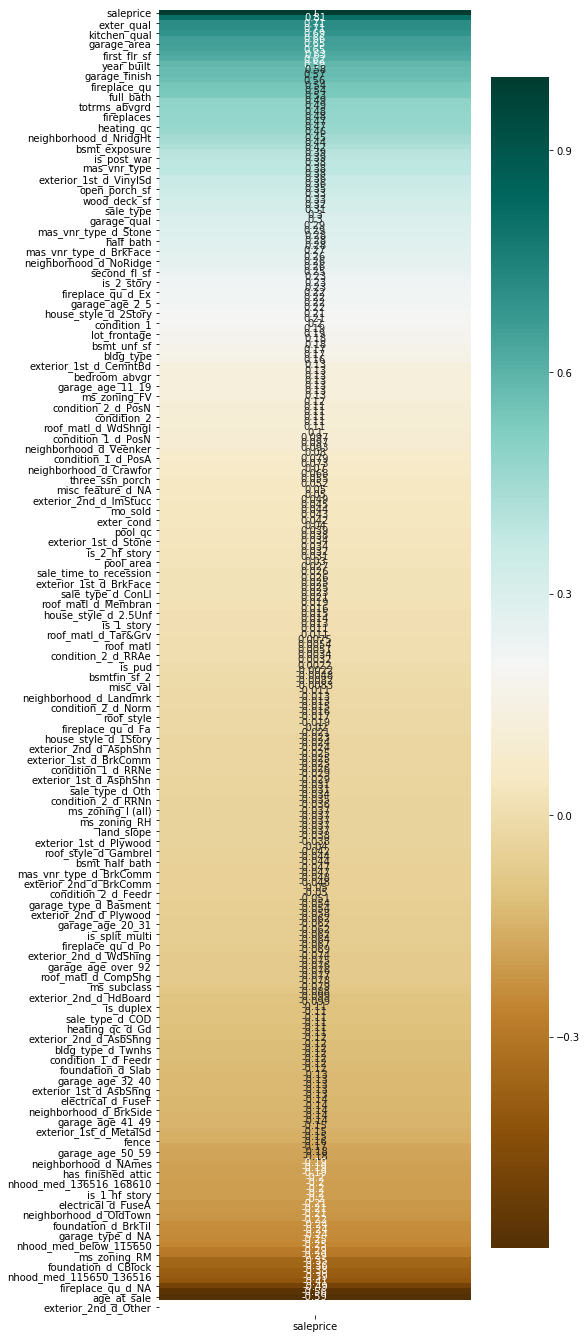

In [199]:
# Heatmap of every correlation with 'saleprice'

plt.figure(figsize=(7,24))
sns.heatmap(df.corr()[['saleprice']].sort_values('saleprice',ascending=False),
            annot=True,cmap='BrBG');

In [200]:
# Variables of interest - high correlation

corr_list = ['saleprice','overall_qual','gr_liv_area',
             'garage_area','first_flr_sf','age_at_sale']

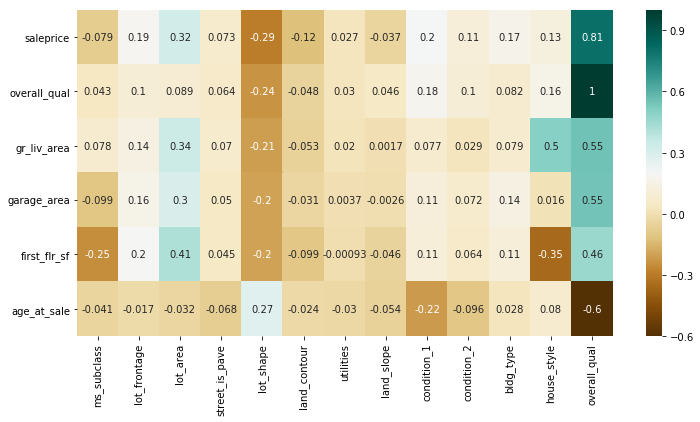

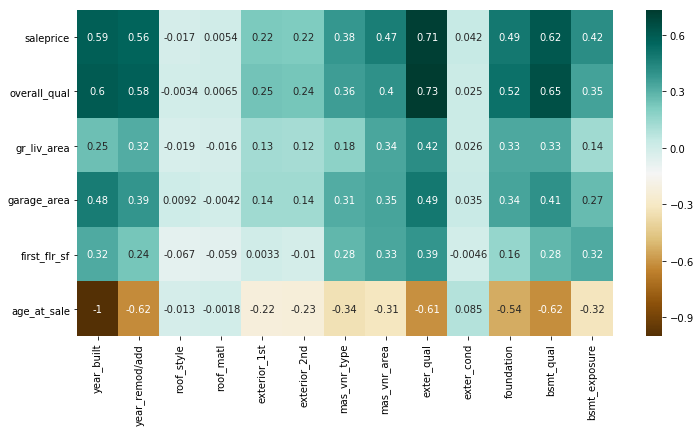

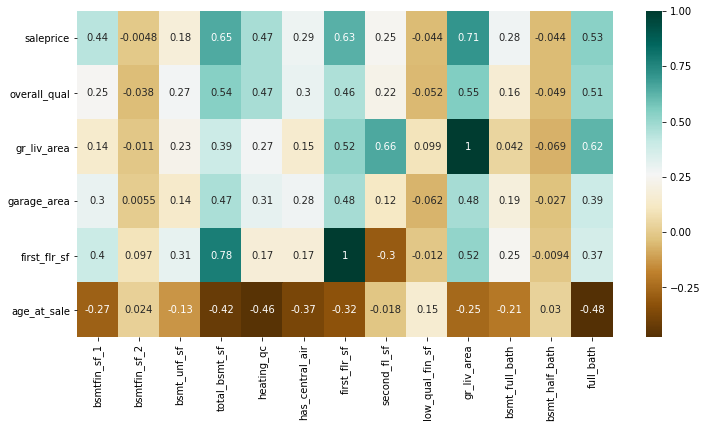

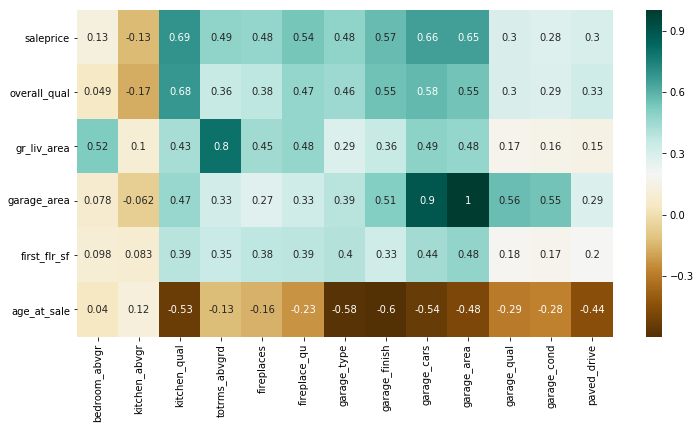

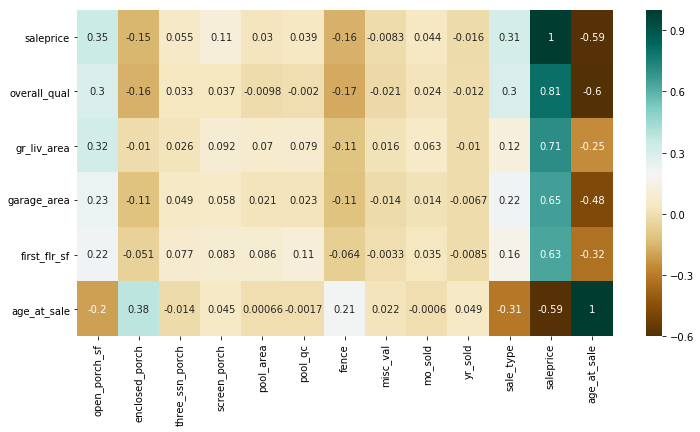

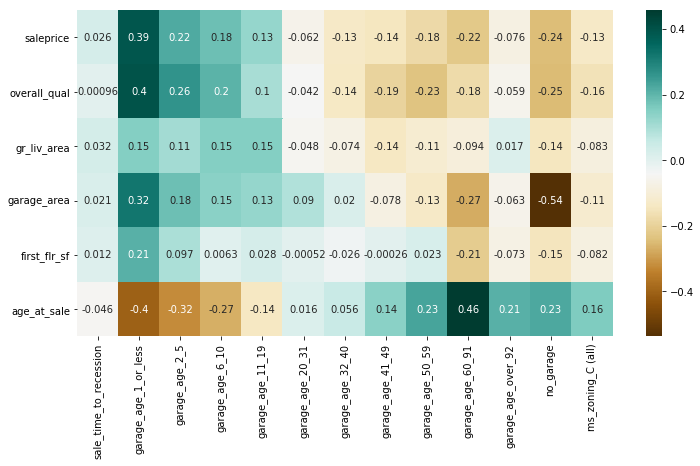

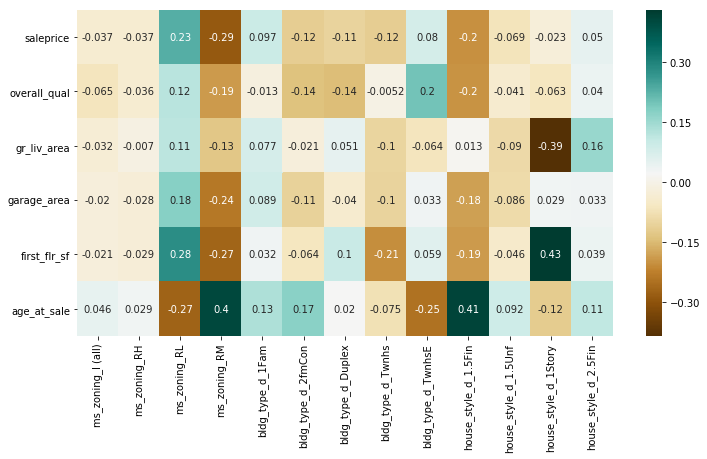

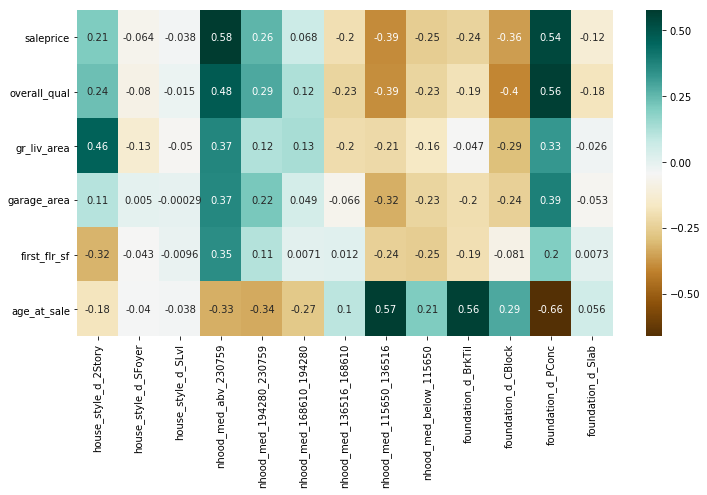

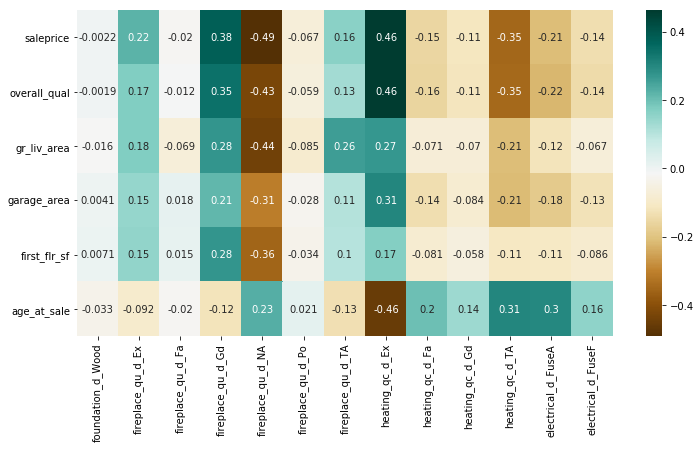

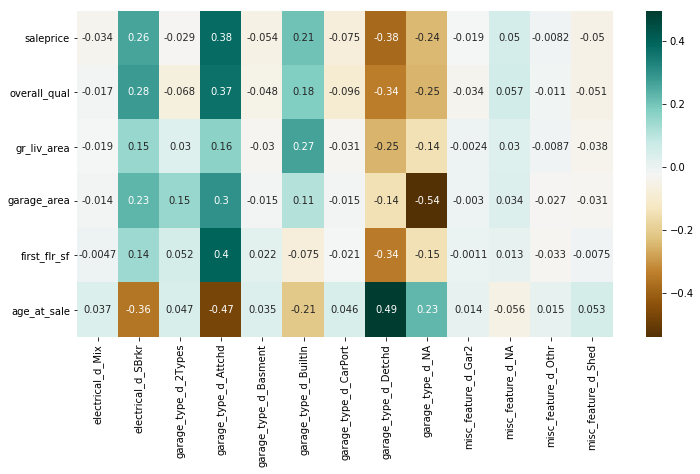

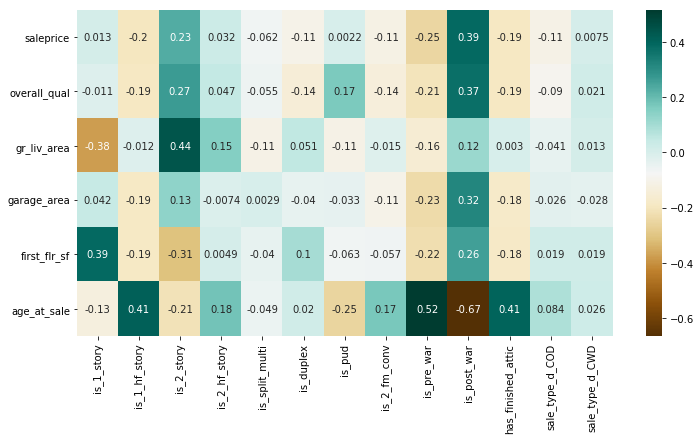

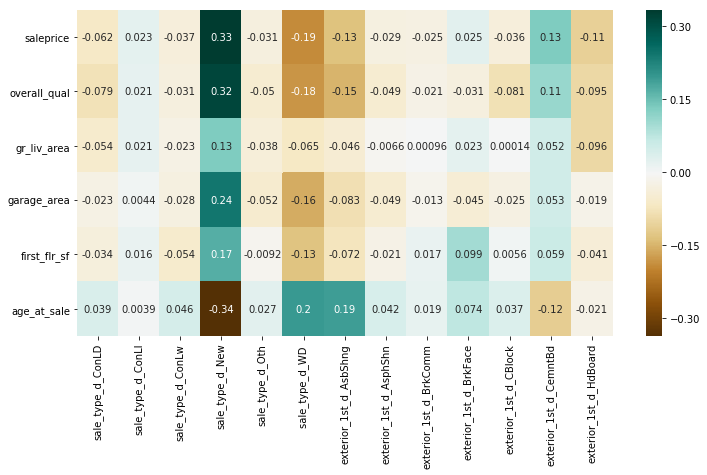

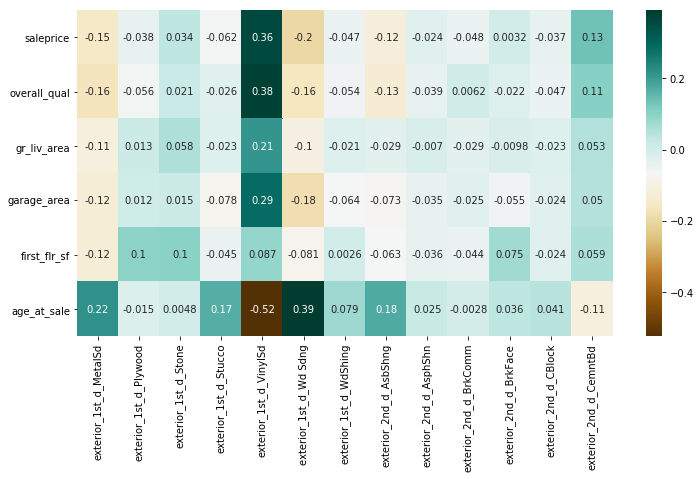

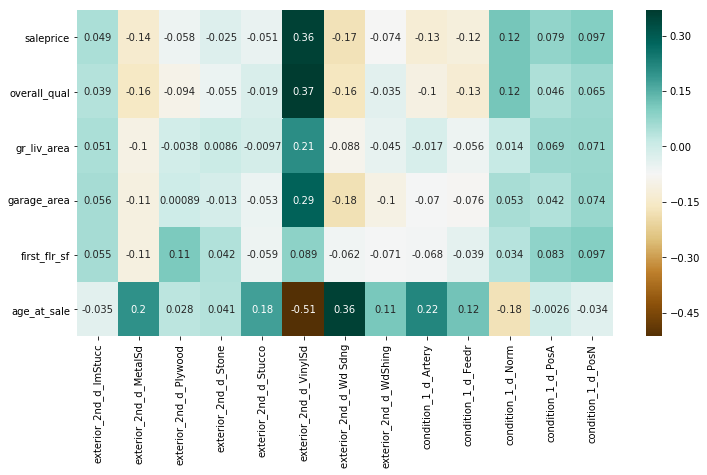

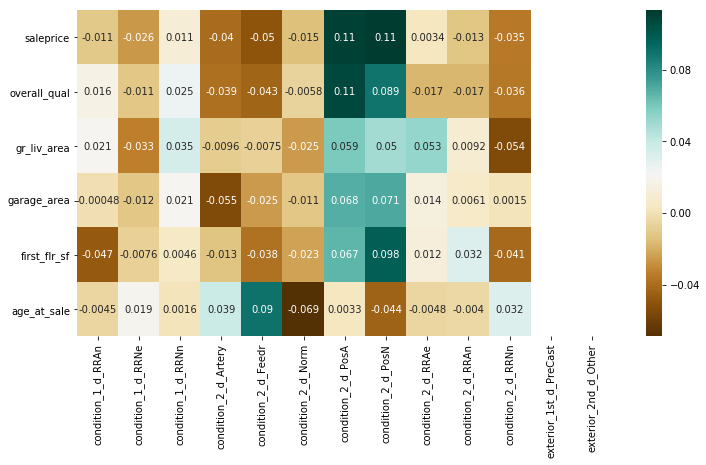

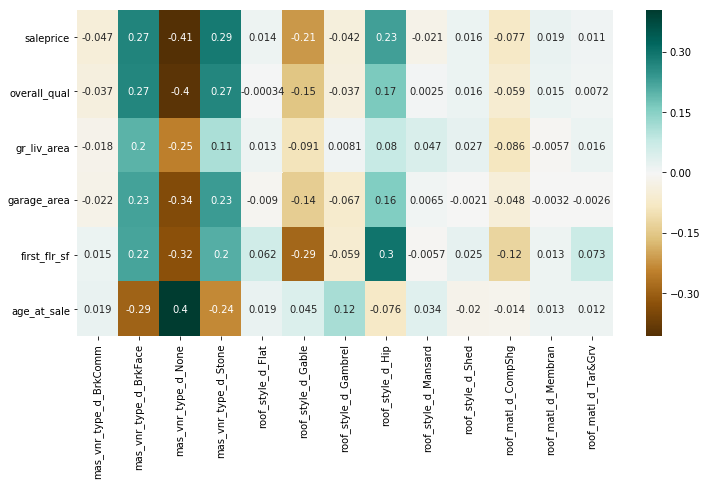

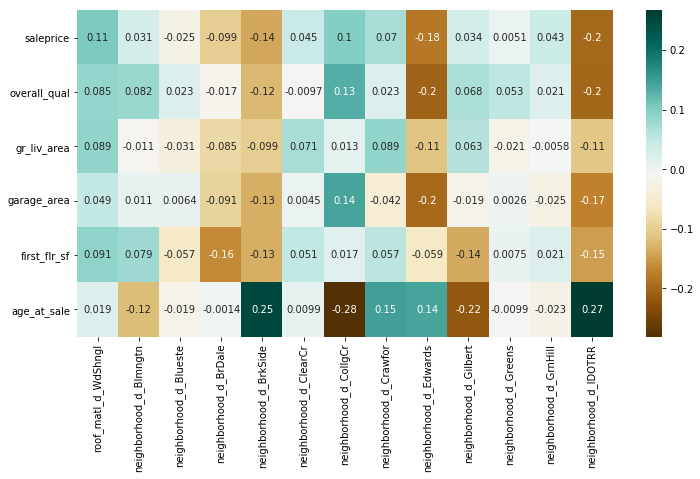

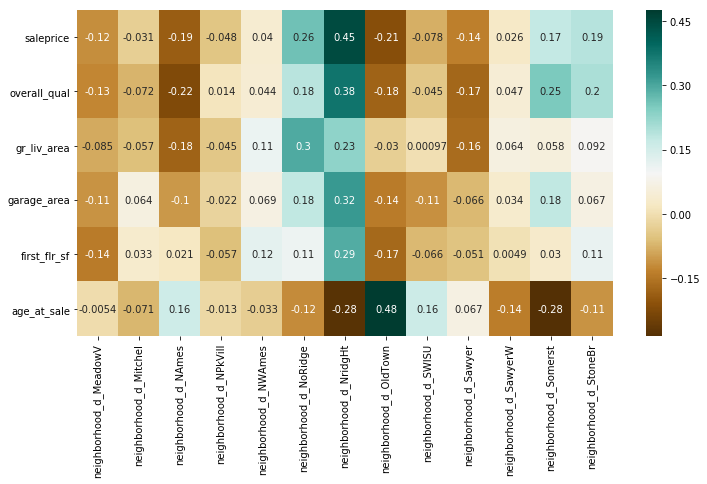

In [201]:
# Plot and display heatmap sections in groups of 12 variables
# Plot against 'corr_list' - variables of interest

counter = 0
corr_df = pd.DataFrame()
corr_df_names = pd.DataFrame()

for col in df.columns.tolist():
    if counter <= 12:
        try: # Error management for non-numeric column values
            for row in corr_list: 
                corr_df.loc[row,col] = np.corrcoef(df[row],df[col])[0,1] # Return top-right corr value in np matrix
                corr_df_names.loc[row,col] = '{}__{}'.format(row, col) # Store column names in dataframe to assign
            counter += 1 
        except:
            continue    # if error, skip and move to next column
    else:       
        plt.figure(figsize=(12,6))
        sns.heatmap(corr_df,annot=True,cmap='BrBG'); # Heatmaps for group of 12
        
        corr_df = pd.DataFrame()
        corr_df_names = pd.DataFrame()
        counter = 0

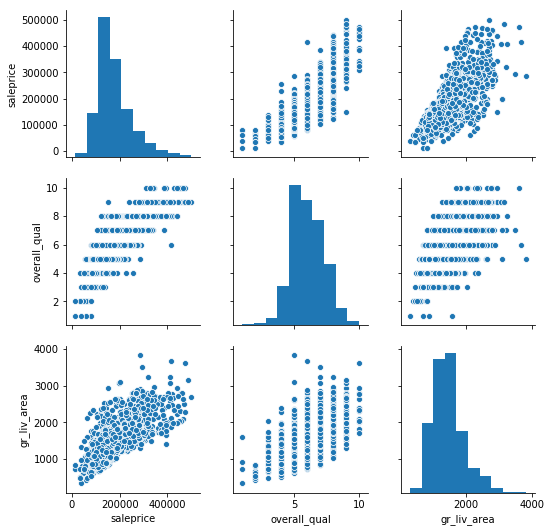

In [202]:
sns.pairplot(df[corr_list[:3]]);

# Modeling

### Polynomial Features

In [203]:
poly = PolynomialFeatures(include_bias=False) # instantiate model

In [204]:
# Select polynomial columns as top 15 ('.iloc[0:15]')

poly_cols = df.corr()[['saleprice']].sort_values('saleprice',ascending=False).iloc[0:15].index.tolist()

In [205]:
# Remove collinear columns

poly_cols.remove('saleprice')
poly_cols.remove('year_built')

### Checking Polynomial Correlation Values

In [206]:
X = df[poly_cols] # Test corr values for polynomials
y = df['saleprice']

In [207]:
X_poly_temp = poly.fit_transform(X) # Fit and transform the model, save transformation to var

In [208]:
# create temporary df

temp_df = pd.DataFrame(X_poly_temp, columns=poly.get_feature_names(poly_cols))
temp_df['saleprice']=df['saleprice']

In [209]:
temp_df.corr()[['saleprice']].sort_values('saleprice',ascending=False).head()

,saleprice
saleprice,1.000000
overall_qual gr_liv_area,0.868766
exter_qual gr_liv_area,0.845971
overall_qual kitchen_qual,0.839813
gr_liv_area bsmt_qual,0.836808


### PolynomialFeatures into DFs

In [210]:
# Commit polynomial columns to training and holdout dataframes

p_features = poly_cols
X = df[p_features] # Prepare modeling matrices
y = df['saleprice']

In [211]:
X_poly = poly.fit_transform(X) # Fit selected columns for poly

In [212]:
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names(p_features))

In [213]:
X_poly_df.drop(p_features,axis=1,inplace=True)

In [214]:
X_poly_df['id'] = df.id # Match index for rows

In [215]:
df = df.merge(X_poly_df, on='id')

In [216]:
df.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street_is_pave,alley,lot_shape,land_contour,...,nhood_med_abv_230759^2,nhood_med_abv_230759 garage_finish,nhood_med_abv_230759 year_remod/add,nhood_med_abv_230759 fireplace_qu,garage_finish^2,garage_finish year_remod/add,garage_finish fireplace_qu,year_remod/add^2,year_remod/add fireplace_qu,fireplace_qu^2
0,109,533352170,60,RL,0.0,13517,1,NA,-1,0,...,0.0,0.0,0.0,0.0,4.0,4010.0,0.0,4020025.0,0.0,0.0
1,544,531379050,60,RL,43.0,11492,1,NA,-1,0,...,0.0,0.0,0.0,0.0,4.0,3994.0,6.0,3988009.0,5991.0,9.0
2,153,535304180,20,RL,68.0,7922,1,NA,0,0,...,0.0,0.0,0.0,0.0,1.0,2007.0,0.0,4028049.0,0.0,0.0
3,318,916386060,60,RL,73.0,9802,1,NA,0,0,...,0.0,0.0,0.0,0.0,9.0,6021.0,0.0,4028049.0,0.0,0.0
4,255,906425045,50,RL,82.0,14235,1,NA,-1,0,...,0.0,0.0,0.0,0.0,1.0,1993.0,0.0,3972049.0,0.0,0.0


In [217]:
X_pred_poly = poly.transform(df_to_pred[p_features])  # repeat for holdout data

In [218]:
X_pred_poly_df = pd.DataFrame(X_pred_poly, columns=poly.get_feature_names(p_features))

In [219]:
X_pred_poly_df.drop(p_features,axis=1,inplace=True)

In [220]:
X_pred_poly_df['id'] = df_to_pred.id

In [221]:
df_to_pred = df_to_pred.merge(X_pred_poly_df, on='id')

In [222]:
df.columns.tolist()[:5]

['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage']

In [223]:
df_to_pred.columns.tolist()[:5]

['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage']

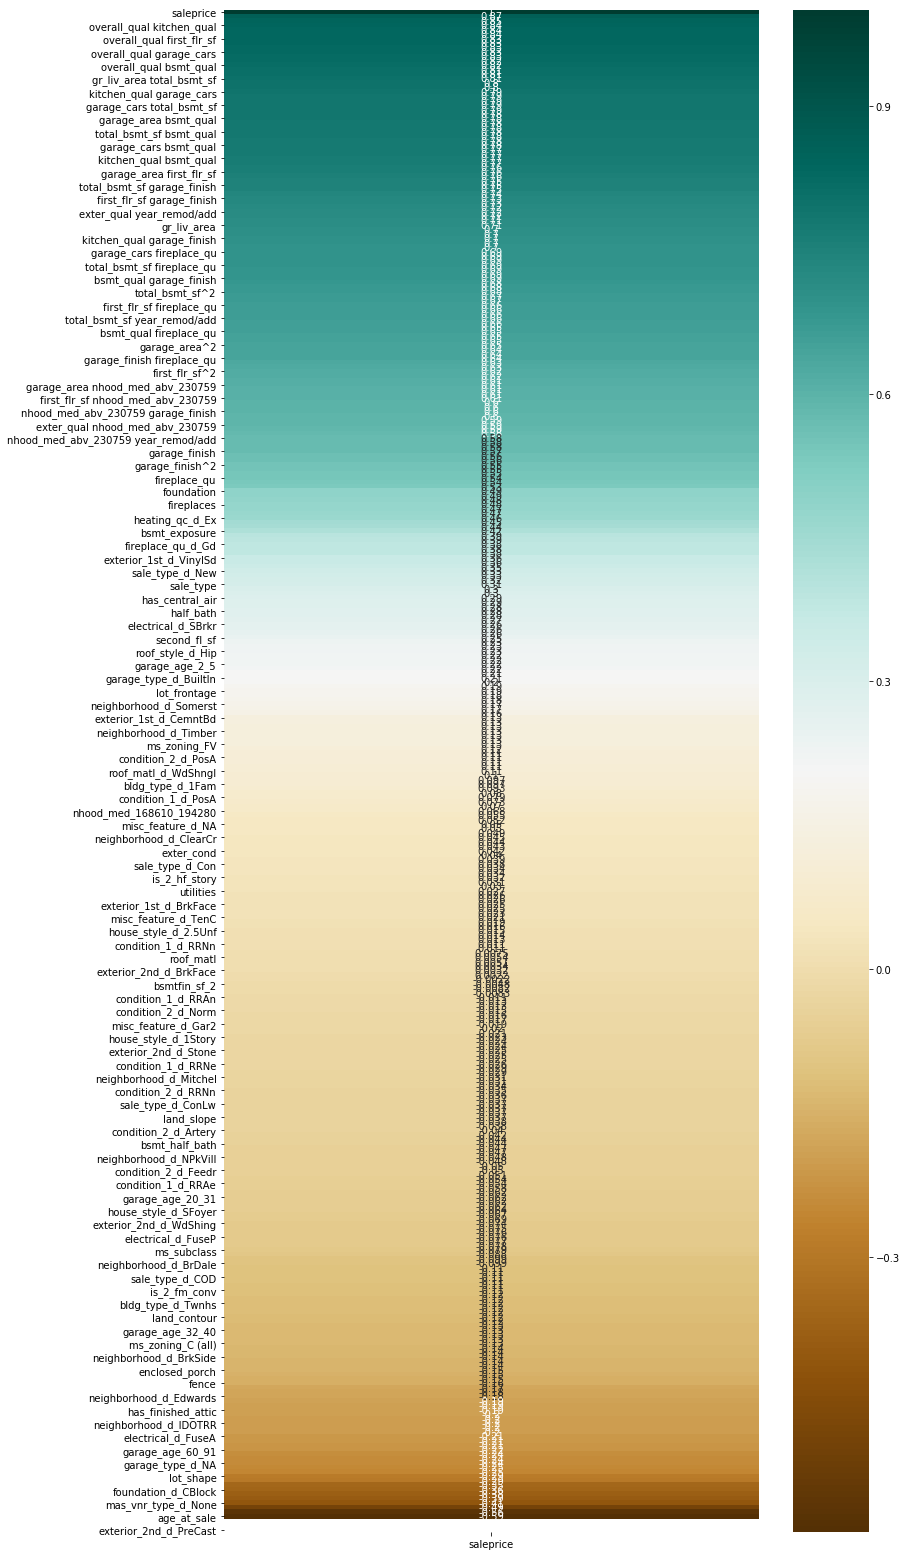

In [224]:
plt.figure(figsize=(12,28))
sns.heatmap(df.corr()[['saleprice']].sort_values('saleprice',ascending=False),
            annot=True,cmap='BrBG');

#### Cubic Variable check

In [225]:
# Add cubic variables for highest-corr polynomial

temp_features = poly_cols
temp_features.extend(['overall_qual gr_liv_area'])

X = df[temp_features] # Set up matrices for modeling
y = df['saleprice']

In [226]:
X_poly_temp = poly.fit_transform(X) # transform for polynomial round 2

In [227]:
temp_df = pd.DataFrame(X_poly_temp, columns=poly.get_feature_names(temp_features))
temp_df['saleprice']=df['saleprice']

In [228]:
temp_df.corr()[['saleprice']].sort_values('saleprice',ascending=False).head()

,saleprice
saleprice,1.000000
bsmt_qual overall_qual gr_liv_area,0.900416
kitchen_qual overall_qual gr_liv_area,0.899436
exter_qual overall_qual gr_liv_area,0.898758
overall_qual overall_qual gr_liv_area,0.890298


#### Add selections to both DFs

In [229]:
# Add selections for two cubic polynomial variables and format with custom label

new_cub_var = 'overall_qual gr_liv_area__ '
new_cub_ref = 'overall_qual gr_liv_area'

for col_name in poly_cols:
    combo_name = new_cub_var + col_name
    df[combo_name] = df[new_cub_ref] * df[col_name]
    df_to_pred[combo_name] = df_to_pred[new_cub_ref] * df_to_pred[col_name]
    print(combo_name)

overall_qual gr_liv_area__ overall_qual
overall_qual gr_liv_area__ exter_qual
overall_qual gr_liv_area__ gr_liv_area
overall_qual gr_liv_area__ kitchen_qual
overall_qual gr_liv_area__ garage_cars
overall_qual gr_liv_area__ garage_area
overall_qual gr_liv_area__ total_bsmt_sf
overall_qual gr_liv_area__ first_flr_sf
overall_qual gr_liv_area__ bsmt_qual
overall_qual gr_liv_area__ nhood_med_abv_230759
overall_qual gr_liv_area__ garage_finish
overall_qual gr_liv_area__ year_remod/add
overall_qual gr_liv_area__ fireplace_qu
overall_qual gr_liv_area__ overall_qual gr_liv_area


In [230]:
new_cub_var = 'exter_qual gr_liv_area__ '
new_cub_ref = 'exter_qual gr_liv_area'

for col_name in poly_cols:
    combo_name = new_cub_var + col_name
    df[combo_name] = df[new_cub_ref] * df[col_name]
    df_to_pred[combo_name] = df_to_pred[new_cub_ref] * df_to_pred[col_name]
    print(combo_name)

exter_qual gr_liv_area__ overall_qual
exter_qual gr_liv_area__ exter_qual
exter_qual gr_liv_area__ gr_liv_area
exter_qual gr_liv_area__ kitchen_qual
exter_qual gr_liv_area__ garage_cars
exter_qual gr_liv_area__ garage_area
exter_qual gr_liv_area__ total_bsmt_sf
exter_qual gr_liv_area__ first_flr_sf
exter_qual gr_liv_area__ bsmt_qual
exter_qual gr_liv_area__ nhood_med_abv_230759
exter_qual gr_liv_area__ garage_finish
exter_qual gr_liv_area__ year_remod/add
exter_qual gr_liv_area__ fireplace_qu
exter_qual gr_liv_area__ overall_qual gr_liv_area


### Train Test Split

In [231]:
# Reset data types for non-numeric id values

df['id'] = df['id'].astype(str)
df['pid'] = df['pid'].astype(str)
df_to_pred['id'] = df_to_pred['id'].astype(str)
df_to_pred['pid'] = df_to_pred['pid'].astype(str)

In [232]:
# Add missing columns from holdout data

df_to_pred['exterior_2nd_d_Stone'] = 0
df_to_pred['neighborhood_d_GrnHill'] = 0
df_to_pred['neighborhood_d_Landmrk'] = 0

In [233]:
# Select numeric columns only from training data as features, then remove saleprice

features = df._get_numeric_data().columns.tolist()
features.remove('saleprice')

X = df[features]
X_holdout = df_to_pred[features]

y = df['saleprice']

In [234]:
X = X.astype(float)
X_holdout = X_holdout.astype(float)

In [235]:
# Perform train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=126)

In [236]:
X_train.shape

(1511, 370)

## Linear Regression

In [237]:
# Linear Regression model instantiation

lr = LinearRegression()

In [238]:
# Fit to X/y training data

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [239]:
# R squared score

lr.score(X_train, y_train)

0.95757611586920177

In [240]:
# Cross validated r-squared score - cv=5 means 5 k-folds in cross validation

cross_val_score(lr, X_train, y_train, cv=5).mean()

0.88309254774710166

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2015 entries, 0 to 2014
Columns: 386 entries, id to exter_qual gr_liv_area__ overall_qual gr_liv_area
dtypes: float64(129), int64(242), object(15)
memory usage: 5.9+ MB


In [242]:
X.dtypes[:5]

ms_subclass       float64
lot_frontage      float64
lot_area          float64
street_is_pave    float64
lot_shape         float64
dtype: object

## Scaling

In [243]:
# # Set values scaled, relative to STD within variable vector.  Set for train, test, holdout

ss = StandardScaler()

X_train_sc_df = pd.DataFrame(ss.fit_transform(X_train, y_train))
X_test_sc_df = pd.DataFrame(ss.transform(X_test))
X_holdout_sc_df = pd.DataFrame(ss.transform(X_holdout[features]))

In [244]:
X_train_sc_df.columns = features # Set column names
X_test_sc_df.columns = features
X_holdout_sc_df.columns = features

## PowerTransformer

**NOTE:** These sections were excluded from the final model due to unexpected results.

### Selecting Power Transform Variables

In [ ]:
# pt_check = pd.DataFrame(X_train_sc_df) # Identify skewed distributions mathematically
# pt_check.columns = features

In [ ]:
# pt_check.head()

In [ ]:
# pt_kurt = [] # Empty lists to store skew values.  Using Pandas builtin capabilities
# pt_skew = []
# ab_skew = []

# for col in features:
#     pt_kurt.append(pt_check[col].kurtosis())
#     pt_skew.append(pt_check[col].skew())
#     ab_skew.append(abs(pt_check[col].skew()))
    

In [ ]:
# kurt_col = pd.DataFrame({'Variable':features,'Kurtosis':pt_kurt,'Skew':pt_skew,'|Skew|':ab_skew})

In [ ]:
# kurt_col.sort_values('|Skew|',ascending=False)[['Variable','|Skew|']].head()

In [ ]:
# new_feat = kurt_col.drop(kurt_col[(kurt_col['|Skew|']>30)].index).sort_values('|Skew|',ascending=False)
# new_feat_list = new_feat['Variable']
# If Abs Skewness is greater than thirty, include

In [ ]:
# pt_new_feat = new_feat[new_feat['|Skew|']>1]['Variable'].tolist() # Then drop skew < 1

In [ ]:
# pt_new_feat[:5]

In [ ]:
# X_train_sc_new = X_train_sc_df[pt_new_feat]
# X_test_sc_new = X_test_sc_df[pt_new_feat]
# X_holdout_sc_new = X_holdout_sc_df[pt_new_feat]

# Select new features only for power transformation

In [ ]:
# X_train_sc_new.head()

### Standardizing PowerTransformer

In [ ]:
# Instantiate model

# pt = PowerTransformer()

# X_train_sc_pre = X_train_sc_new[pt_new_feat] # Set pre-transform group for all dfs
# X_test_sc_pre = X_test_sc_new[pt_new_feat]
# X_holdout_sc_pre = X_holdout_sc_new[pt_new_feat]

# pt.fit(X_train_sc_pre)                        # Fit to training data (scaled)
# X_train_sc_t_mid = pd.DataFrame(pt.transform(X_train_sc_pre)) # Transform test and holdout
# X_train_sc_t_mid.columns = pt_new_feat

# X_test_sc_t_mid = pd.DataFrame(pt.transform(X_test_sc_pre)) # New DF with PT data
# X_test_sc_t_mid.columns = pt_new_feat                        # Column names

# X_holdout_sc_t_mid = pd.DataFrame(pt.transform(X_holdout_sc_pre))
# X_holdout_sc_t_mid.columns = pt_new_feat

In [ ]:
# X_train_sc_df.drop(X_train_sc_pre.columns.tolist(), axis=1, inplace=True)  # Drop untransformed cols
# X_test_sc_df.drop(X_test_sc_pre.columns.tolist(), axis=1, inplace=True)
# X_holdout_sc_df.drop(X_holdout_sc_pre.columns.tolist(), axis=1, inplace=True)

In [ ]:
# X_train_sc_df = X_train_sc_df.merge(X_train_sc_t_mid, left_index=True, right_index=True) # Replace with PT cols
# X_test_sc_df = X_test_sc_df.merge(X_test_sc_t_mid, left_index=True, right_index=True)
# X_holdout_sc_df = X_holdout_sc_df.merge(X_holdout_sc_t_mid, left_index=True, right_index=True)

In [ ]:
# lr.fit(X_train_sc_df, y_train)

In [ ]:
# lr.score(X_train_sc_df, y_train)

In [ ]:
# X_train_sc_df.shape

## Lasso/Ridge

### Lasso

In [245]:
# Instantiate Lasso and Ridge Models

lasso = LassoCV(cv=5)

In [246]:
lasso.fit(X_train_sc_df, y_train) # Fit Lasso to scaled transformed training

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [247]:
lasso.score(X_train_sc_df, y_train)

0.93508100646450809

In [248]:
cross_val_score(lasso, X_train_sc_df, y_train, cv=5)

array([ 0.92967397,  0.93220961,  0.9289683 ,  0.91742972,  0.89742121])

In [249]:
lasso.score(X_test_sc_df, y_test)

0.94165555828599867

In [250]:
cross_val_score(lasso, X_test_sc_df, y_test, cv=5)

array([ 0.91726989,  0.93469646,  0.93525336,  0.9375604 ,  0.93496627])

In [251]:
r2_score(y_test, lasso.predict(X_test_sc_df)) # Rsq for test and predictions

0.94165555828599867

In [252]:
xtst_cols = X_train_sc_df.columns.tolist() # Column names from scaled/pt train data
xtst_cols[:5]

['ms_subclass', 'lot_frontage', 'lot_area', 'street_is_pave', 'lot_shape']

In [253]:
lasso_m = Lasso(alpha=271) # Instantiate manual Lasso - alpha is customized to prevent Convergence Errors

In [254]:
lasso_m.fit(X_train_sc_df, y_train) # Manual Lasso fit and coef
lasso_m.coef_[:5]

array([-2015.01323261,   497.2637212 ,  4079.88738429,    19.26915358,
          -0.        ])

In [255]:
lasso_m.score(X_test_sc_df, y_test)

0.94166268799872566

### Identify 0-val lasso/ridge coefs

In [256]:
co_vals = lasso.coef_ 
co_vals[:5]

array([ -469.86566261,   219.51033487,  3724.9918525 ,     0.        ,
          -0.        ])

In [257]:
len(co_vals)

370

In [258]:
co_vals[:5]

array([ -469.86566261,   219.51033487,  3724.9918525 ,     0.        ,
          -0.        ])

In [259]:
len(xtst_cols)

370

In [260]:
nonzero = [] # Empty lists to store zero and nonzero values, column names
nonzero_coef = []
zeros = []
for i in range(0,len(xtst_cols)):
    if co_vals[i] != 0:
        nonzero.append(xtst_cols[i])
        nonzero_coef.append(co_vals[i])
    else:
        zeros.append(xtst_cols[i])
len(nonzero)

74

In [261]:
len(nonzero)

74

In [262]:
nonzero_coef[:5]

[-469.86566261452219,
 219.51033487401719,
 3724.9918525047733,
 -728.68885132382752,
 1771.4899955905596]

In [263]:
len(zeros)

296

### Ridge

In [264]:
ridge = RidgeCV(cv=5)

In [265]:
ridge.fit(X_train_sc_df, y_train) # Fit Ridge model to training

RidgeCV(alphas=array([  0.1,   1. ,  10. ]), cv=5, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [266]:
cross_val_score(ridge, X_train_sc_df, y_train, cv=5).mean()

0.90674026737557689

In [267]:
cross_val_score(ridge, X_test_sc_df, y_test, cv=5).mean()

0.91149673998631009

In [268]:
ridge.coef_[:5]

array([-2983.44936192,   707.9332092 ,  4913.90415348,   222.12842007,
        -220.44158318])

In [269]:
r2_score(y_test, ridge.predict(X_test_sc_df)) # Ridge Rsq score

0.93411412507407732

In [270]:
ridge.alpha_

10.0

In [271]:
lr.fit(X_train_sc_df, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [272]:
lr.score(X_test_sc_df, y_test)

-4.8357079112827234e+20

In [273]:
X_train_sc_df.head()

,ms_subclass,lot_frontage,lot_area,street_is_pave,lot_shape,land_contour,utilities,land_slope,condition_1,condition_2,...,exter_qual gr_liv_area__ garage_cars,exter_qual gr_liv_area__ garage_area,exter_qual gr_liv_area__ total_bsmt_sf,exter_qual gr_liv_area__ first_flr_sf,exter_qual gr_liv_area__ bsmt_qual,exter_qual gr_liv_area__ nhood_med_abv_230759,exter_qual gr_liv_area__ garage_finish,exter_qual gr_liv_area__ year_remod/add,exter_qual gr_liv_area__ fireplace_qu,exter_qual gr_liv_area__ overall_qual gr_liv_area
0,1.434632,0.681205,0.115139,0.06314,-1.083851,0.282598,0.034535,0.192321,0.339021,0.072095,...,0.125167,-0.012000,0.396505,0.249235,0.287968,1.833627,0.162857,0.185280,0.865790,-0.085044
1,-0.633702,-1.759560,-0.791673,0.06314,0.704030,0.282598,0.034535,0.192321,0.339021,0.072095,...,-0.907299,-0.601775,-0.717986,-0.824425,-0.795055,-0.319243,-0.842030,-0.836807,-0.830020,-0.750589
2,0.515372,-1.759560,0.144086,0.06314,-1.083851,0.282598,0.034535,0.192321,0.339021,0.072095,...,0.376491,0.509076,-0.308313,0.564344,0.046883,-0.319243,0.407468,0.567347,0.658418,0.459739
3,-0.863517,0.223562,0.203829,0.06314,-1.083851,0.282598,0.034535,0.192321,0.339021,0.072095,...,0.218633,0.328434,0.618997,0.468806,0.412821,-0.319243,0.253826,0.337849,-0.830020,0.040898
4,-0.863517,0.772734,0.746643,0.06314,-1.083851,0.282598,0.034535,-4.348268,0.339021,0.072095,...,-0.206309,-0.256921,-0.159417,-0.084034,-0.537002,-0.319243,-0.716683,-0.397354,-0.501285,-0.496965


In [274]:
nonzero[:5]

['ms_subclass', 'lot_frontage', 'lot_area', 'land_contour', 'condition_1']

In [275]:
coef_df = pd.DataFrame({'Var':nonzero,'Coef':nonzero_coef}) # Create DF to sort coefficients
coef_df['Abs Coef'] = abs(coef_df['Coef']) # Create absolute value col to sort

In [276]:
len(coef_df)

74

In [277]:
coef_df.sort_values('Abs Coef',ascending=False).head()

,Coef,Var,Abs Coef
64,15782.590836,overall_qual gr_liv_area__ kitchen_qual,15782.590836
11,6862.546847,bsmtfin_sf_1,6862.546847
66,6850.097781,overall_qual gr_liv_area__ total_bsmt_sf,6850.097781
6,5651.608624,year_built,5651.608624
5,5186.112283,overall_cond,5186.112283


## Modeling - nonzero vals

In [278]:
nz_features = nonzero

In [279]:
X_train_sc_df_2 = X_train_sc_df[nz_features] # New model with zero-coef values removed
X_test_sc_df_2 = X_test_sc_df[nz_features]
X_holdout_sc_df_2 = X_holdout_sc_df[nz_features]
y = df['saleprice']

In [280]:
X_train_sc_df_2.head()

,ms_subclass,lot_frontage,lot_area,land_contour,condition_1,overall_cond,year_built,exterior_2nd,mas_vnr_area,foundation,...,overall_qual gr_liv_area__ kitchen_qual,overall_qual gr_liv_area__ garage_area,overall_qual gr_liv_area__ total_bsmt_sf,overall_qual gr_liv_area__ bsmt_qual,exter_qual gr_liv_area__ overall_qual,exter_qual gr_liv_area__ kitchen_qual,exter_qual gr_liv_area__ garage_area,exter_qual gr_liv_area__ bsmt_qual,exter_qual gr_liv_area__ year_remod/add,exter_qual gr_liv_area__ fireplace_qu
0,1.434632,0.681205,0.115139,0.282598,0.339021,-0.514004,1.185137,0.990206,0.507993,1.072219,...,0.175207,-0.077467,0.276910,0.171395,0.246607,0.286601,-0.012000,0.287968,0.185280,0.865790
1,-0.633702,-1.759560,-0.791673,0.282598,0.339021,2.227150,-1.385850,-0.000656,-0.557608,-0.209524,...,-0.892196,-0.675794,-0.776989,-0.880824,-0.654067,-0.820048,-0.601775,-0.795055,-0.836807,-0.830020
2,0.515372,-1.759560,0.144086,0.282598,0.339021,0.399714,0.016507,-1.486948,1.458558,-1.064019,...,0.180605,0.599213,-0.208801,0.176715,0.252371,0.040257,0.509076,0.046883,0.567347,0.658418
3,-0.863517,0.223562,0.203829,0.282598,0.339021,-0.514004,1.018190,0.990206,-0.145898,1.072219,...,0.285351,0.218928,0.471455,0.279971,0.364222,0.414177,0.328434,0.412821,0.337849,-0.830020
4,-0.863517,0.772734,0.746643,0.282598,0.339021,-0.514004,-0.083661,-1.486948,0.507993,-1.064019,...,-0.600736,-0.333283,-0.258906,-0.593511,-0.581974,-0.556366,-0.256921,-0.537002,-0.397354,-0.501285


In [ ]:
# ss = StandardScaler()
# ss.fit(X_train)
# X_train_sc = ss.transform(X_train)
# X_test_sc = ss.transform(X_test)

In [ ]:
# pt = PowerTransformer()
# X_train_sc_t = pt.fit_transform(X_train_sc)
# X_test_sc_t = pt.transform(X_test_sc)

In [281]:
lr = LinearRegression()
lasso = LassoCV(cv=7)
ridge = RidgeCV(cv=7)
lasso_m = Lasso(alpha=271, tol=0.001)

In [282]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [283]:
lasso.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=7, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [284]:
lasso_m.fit(X_train, y_train)

Lasso(alpha=271, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.001, warm_start=False)

In [285]:
ridge.fit(X_train, y_train)

RidgeCV(alphas=array([  0.1,   1. ,  10. ]), cv=7, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

#### Training $R^2$

In [286]:
lr.score(X_train, y_train)

0.95757611586920177

In [287]:
lasso.score(X_train, y_train)

0.85688326874967136

In [288]:
lasso_m.score(X_train, y_train)

0.93750904827259862

In [289]:
ridge.score(X_train, y_train)

0.95086745570420161

#### Cross-value $R^2$

In [290]:
cross_val_score(lr, X_train, y_train, cv=7).mean()

0.87123891409496979

In [291]:
cross_val_score(lasso, X_train, y_train, cv=7).mean()

0.84750381643496797

In [292]:
cross_val_score(lasso_m, X_train, y_train, cv=7).mean()

0.90093547184752409

In [293]:
cross_val_score(ridge, X_train, y_train, cv=7).mean()

0.88958812034282886

#### Test $R^2$

In [294]:
r2_score(y_test, lr.predict(X_test))

0.93685729229674242

In [295]:
r2_score(y_test, lasso.predict(X_test))

0.86685119683585976

In [296]:
r2_score(y_test, lasso_m.predict(X_test))

0.93312317367733733

In [297]:
r2_score(y_test, ridge.predict(X_test))

0.93697630407101751

## Final Model

In [298]:
# X_train = X_train_sc_df_2[final_features] # Final Features modeling and run
# X_test = X_test_sc_df_2[final_features]
# X_holdout = X_holdout_sc_df_2[final_features]

X_train = X_train_sc_df_2[nz_features] # Final Features modeling and run
X_test = X_test_sc_df_2[nz_features]
X_holdout = X_holdout_sc_df_2[nz_features]
X_train = X_train.astype(float)
X_test = X_test.astype(float)
X_holdout = X_holdout.astype(float)

# y = df['saleprice']

In [299]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [300]:
lasso.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=7, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [301]:
ridge.fit(X_train, y_train)

RidgeCV(alphas=array([  0.1,   1. ,  10. ]), cv=7, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

#### Training $R^2$

In [302]:
lr.score(X_train, y_train)

0.93947957985571273

In [303]:
lasso.score(X_train, y_train)

0.93927419338274865

In [304]:
ridge.score(X_train, y_train)

0.93931994364787608

#### Cross-value $R^2$

In [305]:
cross_val_score(lr, X_train, y_train, cv=7).mean()

0.92490083541682033

In [306]:
lr.score(X_train, y_train)

0.93947957985571273

In [307]:
cross_val_score(lasso, X_train, y_train, cv=7).mean()

0.92579117826102097

In [308]:
cross_val_score(ridge, X_train, y_train, cv=7).mean()

0.92607409156304155

#### Test $R^2$

In [309]:
r2_score(y_test, lr.predict(X_test))

0.94030887542026864

In [310]:
r2_score(y_test, lasso.predict(X_test))

0.94082516028804319

In [311]:
r2_score(y_test, ridge.predict(X_test))

0.94059765208687274

### Test Data

In [ ]:
#df_to_pred = pd.read_csv('./datasets/test.csv')

In [ ]:
#df_to_pred[features].head()

In [ ]:
#X_holdout_sc = pd.DataFrame(ss.transform(df_to_pred[final_features]))

In [ ]:
#X_holdout_sc_t = pt.transform(X_holdout_sc)

In [312]:
X_holdout['id'] = df_to_pred['id']

In [313]:
X_holdout.set_index('id',inplace=True)

In [314]:
X_holdout.index.names = ['Id']

In [315]:
lr.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

RidgeCV(alphas=array([  0.1,   1. ,  10. ]), cv=7, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [316]:
X_holdout.fillna(0,inplace=True)

In [317]:
# X_holdout['pred_sale_price'] = ridge.predict(X_holdout)
X_holdout['pred_sale_price'] = lasso.predict(X_holdout)
# X_holdout['pred_sale_price'] = lr.predict(X_holdout)

In [318]:
X_holdout.head()

,ms_subclass,lot_frontage,lot_area,land_contour,condition_1,overall_cond,year_built,exterior_2nd,mas_vnr_area,foundation,...,overall_qual gr_liv_area__ garage_area,overall_qual gr_liv_area__ total_bsmt_sf,overall_qual gr_liv_area__ bsmt_qual,exter_qual gr_liv_area__ overall_qual,exter_qual gr_liv_area__ kitchen_qual,exter_qual gr_liv_area__ garage_area,exter_qual gr_liv_area__ bsmt_qual,exter_qual gr_liv_area__ year_remod/add,exter_qual gr_liv_area__ fireplace_qu,pred_sale_price
Id,,,,,,,,,,,,,,,,,,,,,
2658,3.043337,0.345600,-0.124036,0.282598,0.339021,2.227150,-2.053638,-1.982379,-0.557608,0.644972,...,0.040237,0.153640,-0.499904,0.084447,-0.655386,-0.052702,-0.633908,0.272399,-0.830020,133386.353567
2718,0.745187,-1.759560,-0.017280,0.282598,0.339021,-1.427722,0.183454,-1.486948,-0.557608,-1.064019,...,0.188115,1.053486,0.230733,-0.169491,-0.086578,0.371893,0.458189,0.363304,-0.830020,161297.091050
2414,0.055743,0.009995,1.510566,0.282598,0.339021,-0.514004,1.151748,0.990206,-0.557608,1.072219,...,-0.111124,-0.436712,0.345622,0.435339,0.491316,-0.050658,0.488313,0.442513,1.038118,216284.421466
1989,-0.633702,0.071014,-0.251733,0.282598,0.339021,0.399714,-1.619576,-0.000656,-0.557608,-1.064019,...,-0.625699,-0.694710,-0.888399,-0.665008,-0.650935,-0.384784,-0.629553,-0.551436,-0.830020,103511.458820
625,-0.863517,-1.759560,-0.050539,0.282598,0.339021,-0.514004,-0.283998,-1.486948,0.937866,-1.064019,...,-0.150110,0.136952,-0.034576,-0.385037,-0.564710,-0.244003,-0.165711,-0.447732,0.475554,181030.833522


In [319]:
# X_holdout.drop(final_features, axis=1, inplace=True)
X_holdout.drop(nz_features, axis=1, inplace=True)

In [320]:
X_holdout.columns = ['SalePrice']

In [321]:
X_holdout.head()

,SalePrice
Id,
2658,133386.353567
2718,161297.091050
2414,216284.421466
1989,103511.458820
625,181030.833522


### Export Submission File
#### Last Export - 181206 - LR/Lasso/Ridge (update filename)

In [323]:
X_holdout.to_csv('./submissions/190312.csv')

In [ ]:
# Final exports!